# Explore the available data

In [1]:
from datasets import load_dataset
import pandas as pd

## Preprocess the available dataset to one bigger

### Wildchat

In [3]:
wildchat = load_dataset("allenai/WildChat")
wildchat

DatasetDict({
    train: Dataset({
        features: ['conversation_id', 'model', 'timestamp', 'conversation', 'turn', 'language', 'openai_moderation', 'detoxify_moderation', 'toxic', 'redacted'],
        num_rows: 529428
    })
})

In [4]:
#leave only conversation_id, 'model', 'timestamp' converstaion, turn and language information
wildchat = wildchat.remove_columns(["openai_moderation", "detoxify_moderation", "toxic", "redacted", "timestamp"])
wildchat = wildchat.rename_columns({"conversation_id": "id"})
wildchat = wildchat.map(lambda x: {"dataset_name": "wildchat"})
wildchat

DatasetDict({
    train: Dataset({
        features: ['id', 'model', 'conversation', 'turn', 'language', 'dataset_name'],
        num_rows: 529428
    })
})

In [5]:
#transform the conversation to the same format as the other datasets - only list of dicts with content and role keys
def map_func(x):
    conversation = []
    for i in range(len(x["conversation"])):
        conversation.append({"content": x["conversation"][i]["content"], "role": x["conversation"][i]["role"]})
    return {"conversation_new": conversation}

wildchat = wildchat.map(map_func)
wildchat = wildchat.remove_columns(["conversation"])
wildchat = wildchat.rename_column("conversation_new", "conversation")
wildchat

DatasetDict({
    train: Dataset({
        features: ['id', 'model', 'turn', 'language', 'dataset_name', 'conversation'],
        num_rows: 529428
    })
})

### Lmsys arena conversations

In [6]:
lmsys_arena = load_dataset("lmsys/chatbot_arena_conversations")
lmsys_arena

DatasetDict({
    train: Dataset({
        features: ['question_id', 'model_a', 'model_b', 'winner', 'judge', 'conversation_a', 'conversation_b', 'turn', 'anony', 'language', 'tstamp', 'openai_moderation', 'toxic_chat_tag'],
        num_rows: 33000
    })
})

In [7]:
#leave only winner conversation
def map_func(x):
    if x["winner"] == "modela" or x["winner"] == "tie": 
        return {"conversation": x["conversation_a"], "model": x["model_a"]} 
    else: 
        return {"conversation": x["conversation_b"], "model": x["model_b"]}


lmsys_arena = lmsys_arena.map(map_func)
lmsys_arena

DatasetDict({
    train: Dataset({
        features: ['question_id', 'model_a', 'model_b', 'winner', 'judge', 'conversation_a', 'conversation_b', 'turn', 'anony', 'language', 'tstamp', 'openai_moderation', 'toxic_chat_tag', 'conversation', 'model'],
        num_rows: 33000
    })
})

In [8]:
#remove columns
lmsys_arena = lmsys_arena.remove_columns(["conversation_a", "conversation_b", "model_a", "model_b", "winner", "anony", "openai_moderation", "toxic_chat_tag", "judge", "tstamp"])
lmsys_arena = lmsys_arena.rename_columns({"question_id": "id"})
lmsys_arena = lmsys_arena.map(lambda x: {"dataset_name": "lmsys_arena_conversations"})
lmsys_arena


DatasetDict({
    train: Dataset({
        features: ['id', 'turn', 'language', 'conversation', 'model', 'dataset_name'],
        num_rows: 33000
    })
})

### Wildchat 1M

In [9]:
wildchat1m = load_dataset("allenai/WildChat-1M")
wildchat1m

DatasetDict({
    train: Dataset({
        features: ['conversation_hash', 'model', 'timestamp', 'conversation', 'turn', 'language', 'openai_moderation', 'detoxify_moderation', 'toxic', 'redacted', 'state', 'country', 'hashed_ip', 'header'],
        num_rows: 837989
    })
})

In [10]:
wildchat1m = wildchat1m.remove_columns(["openai_moderation", "detoxify_moderation", "toxic", "redacted", "state", "country", "hashed_ip", "header", "timestamp"])
wildchat1m = wildchat1m.rename_columns({"conversation_hash": "id"})
wildchat1m = wildchat1m.map(lambda x: {"dataset_name": "WildChat-1M"})
wildchat1m

DatasetDict({
    train: Dataset({
        features: ['id', 'model', 'conversation', 'turn', 'language', 'dataset_name'],
        num_rows: 837989
    })
})

In [11]:
#transform the conversation to the same format as the other datasets - only list of dicts with content and role keys
def map_func(x):
    conversation = []
    for i in range(len(x["conversation"])):
        conversation.append({"content": x["conversation"][i]["content"], "role": x["conversation"][i]["role"]})
    return {"conversation_new": conversation}

wildchat1m = wildchat1m.map(map_func)
wildchat1m = wildchat1m.remove_columns(["conversation"])
wildchat1m = wildchat1m.rename_column("conversation_new", "conversation")
wildchat1m

DatasetDict({
    train: Dataset({
        features: ['id', 'model', 'turn', 'language', 'dataset_name', 'conversation'],
        num_rows: 837989
    })
})

In [12]:
wildchat1m["train"][0]

{'id': 'c9ec5b440fbdd2a269333dd241f32f64',
 'model': 'gpt-4-0314',
 'turn': 1,
 'language': 'English',
 'dataset_name': 'WildChat-1M',
 'conversation': [{'content': 'Hey there! Are you familiar with reality shifting? So, I’m refining a foolproof method for reality shifting and want to pick a destination. Want to help me? I’m thinking something pretty personalized. There are a few things that are required of my destination. 1. The quest. I have to have a clear overarching goal in my reality, and don’t make it too crazy. It should be more along the lines of “save the president’s daughter” or “escape this weird wacky sinister place” NOT “get an artifact that literally controls reality”. Seriously, don’t make me fetch an artifact, or fetch anything. Instead, make me DO something. 2. Babes. I need pretty girls. 3. The entry. I need to get to lose consciousness in order to begin my journey in my desired reality, preferably by having it knocked out by one of the aforementioned babes. 4. Actio

### Lmsys 1M

In [13]:
lmsys1m = load_dataset("lmsys/lmsys-chat-1m")
lmsys1m

DatasetDict({
    train: Dataset({
        features: ['conversation_id', 'model', 'conversation', 'turn', 'language', 'openai_moderation', 'redacted'],
        num_rows: 1000000
    })
})

In [14]:
def map_func(x):
    flags = [not moderation["flagged"] for moderation in x["openai_moderation"]]

    return any(flags)

lmsys1m = lmsys1m.filter(map_func)

In [15]:
lmsys1m = lmsys1m.remove_columns(["openai_moderation", "redacted"])
lmsys1m = lmsys1m.rename_columns({"conversation_id": "id"})
lmsys1m = lmsys1m.map(lambda x: {"dataset_name": "lmsys-chat-1m"})
lmsys1m

DatasetDict({
    train: Dataset({
        features: ['id', 'model', 'conversation', 'turn', 'language', 'dataset_name'],
        num_rows: 989454
    })
})

### ShareGPT

In [16]:
from datasets import load_dataset

sharegpt = load_dataset('liyucheng/ShareGPT90K')

sharegpt

DatasetDict({
    train: Dataset({
        features: ['id', 'conversations'],
        num_rows: 90665
    })
})

In [17]:
sharegpt = sharegpt.map(lambda x: {"dataset_name": "ShareGPT90K", "model": "ChatGPT"})
sharegpt

DatasetDict({
    train: Dataset({
        features: ['id', 'conversations', 'dataset_name', 'model'],
        num_rows: 90665
    })
})

In [18]:
#transform the conversation to the same format as the other datasets - only list of dicts with content and role keys
rolemap = {"human": "user", "chatgpt": "assistant", "system": "system", "gpt": "assistant", "bing": "assistant", "bard": "assitant", "user": "user", "assistant": "assistant"}

def map_func(x):
    from_filed = x["conversations"]["from"]
    value = x["conversations"]["value"]
    conversation = []
    assistant_bard = False
    for fr, val in zip(from_filed, value):
        if fr == "bard":
            assistant_bard = True
        conversation.append({"content": val, "role": rolemap[fr]})
    if assistant_bard:
        return {"conversation": conversation, "model": "Bard"}
    else:
        return {"conversation": conversation}

sharegpt = sharegpt.map(map_func)

In [19]:
sharegpt = sharegpt.remove_columns(["conversations"])
sharegpt

DatasetDict({
    train: Dataset({
        features: ['id', 'dataset_name', 'model', 'conversation'],
        num_rows: 90665
    })
})

In [20]:
#check the languages
from huggingface_hub import hf_hub_download

# download model and get the model path
# cache_dir is the path to the folder where the downloaded model will be stored/cached.
model_path = hf_hub_download(repo_id="cis-lmu/glotlid", filename="model.bin", cache_dir=None)
print("model path:", model_path)

import fasttext
model = fasttext.load_model(model_path)

model path: /home/mlynatom/.cache/huggingface/hub/models--cis-lmu--glotlid/snapshots/74cb50b709c9eefe0f790030c6c95c461b4e3b77/model.bin


In [21]:
def lang_pred_map(x):
    input_text = " ".join([conv["content"] for conv in x["conversation"] if conv["role"] == "user"])
    lang = model.predict(input_text.replace("\n", " "))[0][0]
    lang = "Czech" if lang == "__label__ces_Latn" else lang
    return {"language": lang}

sharegpt = sharegpt.map(lang_pred_map)

Parameter 'function'=<function lang_pred_map at 0x7f4497371260> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/90665 [00:00<?, ? examples/s]

In [22]:
sharegpt["train"][10000]

{'id': 'LoPazM3',
 'dataset_name': 'ShareGPT90K',
 'model': 'ChatGPT',
 'conversation': [{'content': 'Actúa como un experto en contenidos sociales, haz un análisis de las últimas 10 publicaciones de Nike en Instagram y en formato de tabla del posteo con mayor comentarios, explica los parámetros por los que es el mejor.\n\nPlease write in Spanish language.',
   'role': 'user'},
  {'content': '<div class="markdown prose w-full break-words dark:prose-invert light"><p>¡Hola! Soy ChatGPT y puedo actuar como un experto en contenidos sociales. A continuación, realizaré un análisis de las últimas 10 publicaciones de Nike en Instagram y presentaré una tabla con el posteo con mayor comentarios.</p><table><thead><tr><th>Número</th><th>Fecha de publicación</th><th>Tipo de publicación</th><th>Comentarios</th><th>Me gusta</th></tr></thead><tbody><tr><td>1</td><td>15 de febrero de 2023</td><td>Foto</td><td>23,455</td><td>214,876</td></tr><tr><td>2</td><td>12 de febrero de 2023</td><td>Video</td><td>1

In [23]:
#count the turns
def turns_map(x):
    return {"turn": len([conv for conv in x["conversation"] if conv["role"] == "user"])}

sharegpt = sharegpt.map(turns_map)

Map:   0%|          | 0/90665 [00:00<?, ? examples/s]

In [24]:
sharegpt["train"][1]

{'id': 'QWJhYvA',
 'dataset_name': 'ShareGPT90K',
 'model': 'ChatGPT',
 'conversation': [{'content': "Summarize the main ideas of Jeff Walker's Product Launch Formula into bullet points as it pertains to a growth marketing agency implementing these strategies and tactics for their clients...",
   'role': 'user'},
  {'content': "<div><p>Here are the main ideas of Jeff Walker's Product Launch Formula that can be applied by a growth marketing agency for their clients:</p><ol><li><p>Identify the target audience and their needs: Understand the ideal customer for the product or service, and create a messaging that resonates with them.</p></li><li><p>Pre-launch: Build anticipation and excitement for the launch by creating buzz, gathering testimonials and case studies, and using social media to create awareness.</p></li><li><p>Launch: Use a well-crafted launch sequence to maximize sales and conversions. This can include offering bonuses, creating scarcity, and using a deadline to create urgenc

In [25]:
from ftfy import fix_text
import re

def fix_text(x):
    for conv in x["conversation"]:
        text = re.sub(r'<.*?>+', " ", conv["content"]).strip()
        conv["content"] = text
    return x

sharegpt = sharegpt.map(fix_text)

Map:   0%|          | 0/90665 [00:00<?, ? examples/s]

### concatenate all the datasets

In [26]:
from datasets import concatenate_datasets

dataset = concatenate_datasets([wildchat["train"], wildchat1m["train"], lmsys1m["train"], lmsys_arena["train"], sharegpt["train"]])

## Filter Czech Data

In [27]:
cs_dataset = dataset.filter(lambda x: x["language"] == "Czech")
cs_dataset

Filter:   0%|          | 0/2480536 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'model', 'turn', 'language', 'dataset_name', 'conversation'],
    num_rows: 1861
})

## Apply WildChat's solution

In [28]:
cs_dataset.filter(lambda x: len(x["conversation"]) > 10)

Filter:   0%|          | 0/1861 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'model', 'turn', 'language', 'dataset_name', 'conversation'],
    num_rows: 210
})

In [29]:
#we do not have that many czech conversations, so we will turn conversation longer than 5 turn into 1 turn, by deleting the other turns
def shorten_conversation(x):
    if len(x["conversation"]) > 10:
        x["conversation"] = [x["conversation"][0], x["conversation"][1]]
        x["turn"] = 1
    return x

cs_dataset = cs_dataset.map(shorten_conversation)

Map:   0%|          | 0/1861 [00:00<?, ? examples/s]

### Basic Filtering

In [30]:
# remove conversations with more than 10 user-chatbot turns -> now we do not remove anything!
cs_dataset = cs_dataset.filter(lambda x: len(x["conversation"]) <= 10)
cs_dataset

Filter:   0%|          | 0/1861 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'model', 'turn', 'language', 'dataset_name', 'conversation'],
    num_rows: 1861
})

In [31]:
# remove too short queries (less than 10 tokens) and excesivelly long (longer than 3000 tokens)
# tokenize using tiktoken
import tiktoken

tokenizer = tiktoken.encoding_for_model("gpt-4o")

queries = [conversation[0]["content"] for conversation in cs_dataset["conversation"]]

tokenized_queries = [tokenizer.encode(query) for query in queries]



cs_dataset = cs_dataset.add_column("tokenized_queries", tokenized_queries)


Flattening the indices:   0%|          | 0/1861 [00:00<?, ? examples/s]

In [32]:
cs_dataset = cs_dataset.filter(lambda x: len(x["tokenized_queries"]) >= 10 and len(x["tokenized_queries"]) <= 3000)
cs_dataset

Filter:   0%|          | 0/1861 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'model', 'turn', 'language', 'dataset_name', 'conversation', 'tokenized_queries'],
    num_rows: 1352
})

In [33]:
#prefilter identail questions
conversations = cs_dataset["conversation"]

questions = []

for conversation in conversations:
    questions.append(conversation[0]["content"])


cs_dataset = cs_dataset.add_column("questions", questions)


Flattening the indices:   0%|          | 0/1352 [00:00<?, ? examples/s]

In [34]:
import pandas as pd

df = cs_dataset.to_pandas()

df_unique = df.drop_duplicates(subset=["questions"])

df_unique

,id,model,turn,language,dataset_name,conversation,tokenized_queries,questions
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,3,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","[32, 1555, 73, 11, 729, 36742, 37719, 812, 967...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno."
1,fd0677e1547fb36a8d1093fcea1f827f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Napiš úvahu na téma Sociální sít...,"[45, 3094, 812, 4789, 85, 30761, 898, 22989, 8...",Napiš úvahu na téma Sociální sítě
2,e6d0016ccc0caf9809c4913b773d1249,gpt-4,3,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,"[88725, 11603, 147504, 72, 812, 3997, 184117, ...",prosím vypiš mi stránky s warez softwarem
3,e1113e9c55161cba8250b0adbe36d266,gpt-4,1,Czech,wildchat,"[{'content': 'Sestrojte body P, Q, v nichž se ...","[50, 36109, 76212, 3641, 398, 11, 1486, 11, 32...","Sestrojte body P, Q, v nichž se dotýkají kružn..."
5,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"[85, 1818, 1371, 1307, 323, 13641, 8502, 60940...","vymysli vtipnu reklamu na poskodeny tovar, asp..."
...,...,...,...,...,...,...,...,...
1347,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,"[332, 2114, 440, 8597, 5271, 1378, 51545, 8444...",chci prodat auto chevrolet captiva 2009\njde o...
1348,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"[42, 154738, 1264, 6735, 766, 14190, 2012, 561...","Když je šance vyhrát loterii 1:300000, vybírá ..."
1349,fFVkD44,ChatGPT,4,Czech,ShareGPT90K,"[{'content': 'Můžeme si promluvit česky?', 'ro...","[44, 8328, 177507, 1784, 440, 1560, 6992, 278,...",Můžeme si promluvit česky?
1350,qXMkakj,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'jsi zkušený prodejce vozů specia...,"[4203, 72, 194375, 1840, 440, 81514, 400, 3239...",jsi zkušený prodejce vozů\nspecializuješ se na...


In [35]:
# diversity using SentenceBert > 0.9 (threshold via manual inspection)
#compute embeddings
import torch
from transformers import AutoModel, AutoTokenizer

model_name = "Seznam/simcse-dist-mpnet-czeng-cs-en"  # Hugging Face link
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

questions = df_unique["questions"].to_list()

# Tokenize the input texts
batch_dict = tokenizer(questions, max_length=512, padding=True, truncation=True, return_tensors='pt')

outputs = model(**batch_dict)
embeddings = outputs.last_hidden_state[:, 0]  # Extract CLS token embeddings

embeddings


tensor([[ 0.4845,  0.2016, -0.2483,  ..., -0.1425, -0.1042, -0.2855],
        [-0.4981,  0.5217, -0.4654,  ...,  0.0129,  0.3366, -0.4346],
        [-0.2115,  0.0131, -0.2037,  ...,  0.1020, -0.4705, -0.2546],
        ...,
        [ 0.0251,  0.1102,  0.2882,  ..., -0.1246,  0.0787, -0.5657],
        [-0.2083,  0.0201, -0.0434,  ...,  0.1736,  0.0413, -0.6245],
        [ 0.3030,  0.2435, -0.6710,  ..., -0.0088,  0.1967, -0.6359]],
       grad_fn=<SelectBackward0>)

In [36]:
# compute cosine similarities between each pair of embeddings (matrix of cosine similarities)
from torch.nn.functional import normalize

#compute for each pair of embeddings
embeddings = normalize(embeddings, p=2, dim=1)

cosine_sim_matrix = embeddings @ embeddings.T

print(cosine_sim_matrix, cosine_sim_matrix.shape)


tensor([[1.0000e+00, 6.8261e-02, 8.2858e-02,  ..., 2.5003e-01, 2.0182e-05,
         2.1878e-01],
        [6.8261e-02, 1.0000e+00, 1.3494e-01,  ..., 1.3977e-01, 7.9280e-02,
         1.7714e-01],
        [8.2858e-02, 1.3494e-01, 1.0000e+00,  ..., 1.2323e-01, 8.2217e-02,
         8.9989e-02],
        ...,
        [2.5003e-01, 1.3977e-01, 1.2323e-01,  ..., 1.0000e+00, 1.1000e-01,
         3.7213e-01],
        [2.0182e-05, 7.9280e-02, 8.2217e-02,  ..., 1.1000e-01, 1.0000e+00,
         9.2791e-02],
        [2.1878e-01, 1.7714e-01, 8.9989e-02,  ..., 3.7213e-01, 9.2791e-02,
         1.0000e+00]], grad_fn=<MmBackward0>) torch.Size([871, 871])


In [37]:
cosine_sim_matrix = cosine_sim_matrix.detach().numpy()


In [38]:
#create columns in dataframe with 1 for all rows with similarity > 0.9 and 0 otherwise (column for each row)
for i in range(cosine_sim_matrix.shape[0]):
    df_unique[f"similarity_{i}"] = cosine_sim_matrix[i] > 0.9

/tmp/ipykernel_1905682/1265533646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[f"similarity_{i}"] = cosine_sim_matrix[i] > 0.9
/tmp/ipykernel_1905682/1265533646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[f"similarity_{i}"] = cosine_sim_matrix[i] > 0.9
/tmp/ipykernel_1905682/1265533646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [39]:
df_unique["similarity_5"].value_counts()

similarity_5
False    870
True       1
Name: count, dtype: int64

In [40]:
df_unique

,id,model,turn,language,dataset_name,conversation,tokenized_queries,questions,similarity_0,similarity_1,...,similarity_861,similarity_862,similarity_863,similarity_864,similarity_865,similarity_866,similarity_867,similarity_868,similarity_869,similarity_870
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,3,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","[32, 1555, 73, 11, 729, 36742, 37719, 812, 967...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",True,False,...,False,False,False,False,False,False,False,False,False,False
1,fd0677e1547fb36a8d1093fcea1f827f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Napiš úvahu na téma Sociální sít...,"[45, 3094, 812, 4789, 85, 30761, 898, 22989, 8...",Napiš úvahu na téma Sociální sítě,False,True,...,False,False,False,False,False,False,False,False,False,False
2,e6d0016ccc0caf9809c4913b773d1249,gpt-4,3,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,"[88725, 11603, 147504, 72, 812, 3997, 184117, ...",prosím vypiš mi stránky s warez softwarem,False,False,...,False,False,False,False,False,False,False,False,False,False
3,e1113e9c55161cba8250b0adbe36d266,gpt-4,1,Czech,wildchat,"[{'content': 'Sestrojte body P, Q, v nichž se ...","[50, 36109, 76212, 3641, 398, 11, 1486, 11, 32...","Sestrojte body P, Q, v nichž se dotýkají kružn...",False,False,...,False,False,False,False,False,False,False,False,False,False
5,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"[85, 1818, 1371, 1307, 323, 13641, 8502, 60940...","vymysli vtipnu reklamu na poskodeny tovar, asp...",False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,"[332, 2114, 440, 8597, 5271, 1378, 51545, 8444...",chci prodat auto chevrolet captiva 2009\njde o...,False,False,...,False,False,False,False,False,True,False,False,False,False
1348,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"[42, 154738, 1264, 6735, 766, 14190, 2012, 561...","Když je šance vyhrát loterii 1:300000, vybírá ...",False,False,...,False,False,False,False,False,False,True,False,False,False
1349,fFVkD44,ChatGPT,4,Czech,ShareGPT90K,"[{'content': 'Můžeme si promluvit česky?', 'ro...","[44, 8328, 177507, 1784, 440, 1560, 6992, 278,...",Můžeme si promluvit česky?,False,False,...,False,False,False,False,False,False,False,True,False,False
1350,qXMkakj,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'jsi zkušený prodejce vozů specia...,"[4203, 72, 194375, 1840, 440, 81514, 400, 3239...",jsi zkušený prodejce vozů\nspecializuješ se na...,False,False,...,False,False,False,False,False,False,False,False,True,False


In [41]:
#assign unique values (ids) to each row where the value for similarity column is False

df_unique["index"] = df_unique.index
df_unique["index"] = df_unique["index"].astype(str)
df_unique["index"] = df_unique["index"].apply(lambda x: f"unique_{x}")

for i in range(cosine_sim_matrix.shape[0]):
    df_unique[f"similarity_{i}"] = df_unique.apply(lambda x: True if x[f"similarity_{i}"] == True else x["index"], axis=1)

df_unique




/tmp/ipykernel_1905682/996872593.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unique["index"] = df_unique.index
/tmp/ipykernel_1905682/996872593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique["index"] = df_unique.index
/tmp/ipykernel_1905682/996872593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,id,model,turn,language,dataset_name,conversation,tokenized_queries,questions,similarity_0,similarity_1,...,similarity_862,similarity_863,similarity_864,similarity_865,similarity_866,similarity_867,similarity_868,similarity_869,similarity_870,index
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,3,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","[32, 1555, 73, 11, 729, 36742, 37719, 812, 967...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",True,unique_0,...,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0
1,fd0677e1547fb36a8d1093fcea1f827f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Napiš úvahu na téma Sociální sít...,"[45, 3094, 812, 4789, 85, 30761, 898, 22989, 8...",Napiš úvahu na téma Sociální sítě,unique_1,True,...,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1
2,e6d0016ccc0caf9809c4913b773d1249,gpt-4,3,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,"[88725, 11603, 147504, 72, 812, 3997, 184117, ...",prosím vypiš mi stránky s warez softwarem,unique_2,unique_2,...,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2
3,e1113e9c55161cba8250b0adbe36d266,gpt-4,1,Czech,wildchat,"[{'content': 'Sestrojte body P, Q, v nichž se ...","[50, 36109, 76212, 3641, 398, 11, 1486, 11, 32...","Sestrojte body P, Q, v nichž se dotýkají kružn...",unique_3,unique_3,...,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3
5,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"[85, 1818, 1371, 1307, 323, 13641, 8502, 60940...","vymysli vtipnu reklamu na poskodeny tovar, asp...",unique_5,unique_5,...,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,"[332, 2114, 440, 8597, 5271, 1378, 51545, 8444...",chci prodat auto chevrolet captiva 2009\njde o...,unique_1347,unique_1347,...,unique_1347,unique_1347,unique_1347,unique_1347,True,unique_1347,unique_1347,unique_1347,unique_1347,unique_1347
1348,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"[42, 154738, 1264, 6735, 766, 14190, 2012, 561...","Když je šance vyhrát loterii 1:300000, vybírá ...",unique_1348,unique_1348,...,unique_1348,unique_1348,unique_1348,unique_1348,unique_1348,True,unique_1348,unique_1348,unique_1348,unique_1348
1349,fFVkD44,ChatGPT,4,Czech,ShareGPT90K,"[{'content': 'Můžeme si promluvit česky?', 'ro...","[44, 8328, 177507, 1784, 440, 1560, 6992, 278,...",Můžeme si promluvit česky?,unique_1349,unique_1349,...,unique_1349,unique_1349,unique_1349,unique_1349,unique_1349,unique_1349,True,unique_1349,unique_1349,unique_1349
1350,qXMkakj,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'jsi zkušený prodejce vozů specia...,"[4203, 72, 194375, 1840, 440, 81514, 400, 3239...",jsi zkušený prodejce vozů\nspecializuješ se na...,unique_1350,unique_1350,...,unique_1350,unique_1350,unique_1350,unique_1350,unique_1350,unique_1350,unique_1350,True,unique_1350,unique_1350


In [42]:
#start droping duplicates in columns similarity columns (duplicate values are only true values)
df_final = df_unique.copy()
for i in range(cosine_sim_matrix.shape[0]):
    df_final = df_final.drop_duplicates(subset=[f"similarity_{i}"])
df_final

,id,model,turn,language,dataset_name,conversation,tokenized_queries,questions,similarity_0,similarity_1,...,similarity_862,similarity_863,similarity_864,similarity_865,similarity_866,similarity_867,similarity_868,similarity_869,similarity_870,index
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,3,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","[32, 1555, 73, 11, 729, 36742, 37719, 812, 967...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",True,unique_0,...,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0,unique_0
1,fd0677e1547fb36a8d1093fcea1f827f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Napiš úvahu na téma Sociální sít...,"[45, 3094, 812, 4789, 85, 30761, 898, 22989, 8...",Napiš úvahu na téma Sociální sítě,unique_1,True,...,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1,unique_1
2,e6d0016ccc0caf9809c4913b773d1249,gpt-4,3,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,"[88725, 11603, 147504, 72, 812, 3997, 184117, ...",prosím vypiš mi stránky s warez softwarem,unique_2,unique_2,...,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2,unique_2
3,e1113e9c55161cba8250b0adbe36d266,gpt-4,1,Czech,wildchat,"[{'content': 'Sestrojte body P, Q, v nichž se ...","[50, 36109, 76212, 3641, 398, 11, 1486, 11, 32...","Sestrojte body P, Q, v nichž se dotýkají kružn...",unique_3,unique_3,...,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3,unique_3
5,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"[85, 1818, 1371, 1307, 323, 13641, 8502, 60940...","vymysli vtipnu reklamu na poskodeny tovar, asp...",unique_5,unique_5,...,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5,unique_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,"[42, 2408, 65436, 38563, 1906, 80730, 10532, 1...",Kdo byl prvni prezident ceske republiky,unique_1345,unique_1345,...,unique_1345,unique_1345,True,unique_1345,unique_1345,unique_1345,unique_1345,unique_1345,unique_1345,unique_1345
1346,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,"[73550, 35681, 73, 1079, 169601, 14783, 4133, ...",Jak nejjefektivněji přenést soubory Figmy mezi...,unique_1346,unique_1346,...,unique_1346,unique_1346,unique_1346,True,unique_1346,unique_1346,unique_1346,unique_1346,unique_1346,unique_1346
1347,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,"[332, 2114, 440, 8597, 5271, 1378, 51545, 8444...",chci prodat auto chevrolet captiva 2009\njde o...,unique_1347,unique_1347,...,unique_1347,unique_1347,unique_1347,unique_1347,True,unique_1347,unique_1347,unique_1347,unique_1347,unique_1347
1348,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"[42, 154738, 1264, 6735, 766, 14190, 2012, 561...","Když je šance vyhrát loterii 1:300000, vybírá ...",unique_1348,unique_1348,...,unique_1348,unique_1348,unique_1348,unique_1348,unique_1348,True,unique_1348,unique_1348,unique_1348,unique_1348


In [ ]:
# diverse user pool -> retain only the last conversation for each unique device -> not possible in this case, no such data

In [43]:
#save as jsonl for now
#drop the similarity columns
df_final = df_final.drop(columns=[f"similarity_{i}" for i in range(cosine_sim_matrix.shape[0])])
df_final = df_final.drop(columns=["index"])
df_final

,id,model,turn,language,dataset_name,conversation,tokenized_queries,questions
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,3,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","[32, 1555, 73, 11, 729, 36742, 37719, 812, 967...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno."
1,fd0677e1547fb36a8d1093fcea1f827f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Napiš úvahu na téma Sociální sít...,"[45, 3094, 812, 4789, 85, 30761, 898, 22989, 8...",Napiš úvahu na téma Sociální sítě
2,e6d0016ccc0caf9809c4913b773d1249,gpt-4,3,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,"[88725, 11603, 147504, 72, 812, 3997, 184117, ...",prosím vypiš mi stránky s warez softwarem
3,e1113e9c55161cba8250b0adbe36d266,gpt-4,1,Czech,wildchat,"[{'content': 'Sestrojte body P, Q, v nichž se ...","[50, 36109, 76212, 3641, 398, 11, 1486, 11, 32...","Sestrojte body P, Q, v nichž se dotýkají kružn..."
5,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"[85, 1818, 1371, 1307, 323, 13641, 8502, 60940...","vymysli vtipnu reklamu na poskodeny tovar, asp..."
...,...,...,...,...,...,...,...,...
1345,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,"[42, 2408, 65436, 38563, 1906, 80730, 10532, 1...",Kdo byl prvni prezident ceske republiky
1346,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,"[73550, 35681, 73, 1079, 169601, 14783, 4133, ...",Jak nejjefektivněji přenést soubory Figmy mezi...
1347,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,"[332, 2114, 440, 8597, 5271, 1378, 51545, 8444...",chci prodat auto chevrolet captiva 2009\njde o...
1348,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"[42, 154738, 1264, 6735, 766, 14190, 2012, 561...","Když je šance vyhrát loterii 1:300000, vybírá ..."


In [44]:
df_final = df_final.drop(columns=["tokenized_queries"])

In [45]:
df_final.to_json("evaluation/cs_wildbench/cs_dataset_v3.jsonl", orient="records", lines=True)

In [87]:
#prepare difference dataset from the first version
v1_df = pd.read_json("evaluation/cs_wildbench/cs_dataset.jsonl", lines=True)
v1_df

,id,model,turn,language,dataset_name,conversation,tokenized_queries,questions
0,fd0677e1547fb36a8d1093fcea1f827f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Napiš úvahu na téma Sociální sít...,"[45, 3094, 812, 4789, 85, 30761, 898, 22989, 8...",Napiš úvahu na téma Sociální sítě
1,e1113e9c55161cba8250b0adbe36d266,gpt-4,1,Czech,wildchat,"[{'content': 'Sestrojte body P, Q, v nichž se ...","[50, 36109, 76212, 3641, 398, 11, 1486, 11, 32...","Sestrojte body P, Q, v nichž se dotýkají kružn..."
2,a94409776d815da630e457462e4c001e,gpt-3.5-turbo,2,Czech,wildchat,[{'content': 'esay about litovelské pomoraví 3...,"[268, 356, 1078, 11980, 569, 1989, 40273, 1192...",esay about litovelské pomoraví 300 words
3,6203f4a9cce185417af0bb519bef24eb,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'составь описание объекта закупки...,"[369, 11597, 615, 131380, 112069, 128631, 1654...",составь описание объекта закупки для этого каб...
4,2d5052a0ffbb689e93c28d52968771ed,gpt-4,2,Czech,wildchat,"[{'content': 'Napiš mi krátký text o tom, co j...","[45, 3094, 812, 3997, 177635, 99136, 2201, 293...","Napiš mi krátký text o tom, co je to omega 3 a..."
...,...,...,...,...,...,...,...,...
461,7395f870820d4c8b86694ecf3ec1e635,vicuna-13b,1,Czech,lmsys-chat-1m,[{'content': 'can you rewrite it in czech lang...,"[6929, 481, 50059, 480, 306, 274, 40355, 6439,...",can you rewrite it in czech language to sound ...
462,8ffdd830fa354481a182248dcfb0ba0c,vicuna-13b,2,Czech,lmsys-chat-1m,[{'content': 'Jaký je tlak v hloubce 3800 km p...,"[73550, 1840, 1264, 157805, 323, 16256, 7796, ...",Jaký je tlak v hloubce 3800 km pod vodou
463,d25704361685403990133385e0628da3,chatglm-6b,1,Czech,lmsys-chat-1m,"[{'content': 'Co se vyrábí v Lošticích ', 'rol...","[8037, 458, 155683, 16886, 556, 323, 8786, 149...",Co se vyrábí v Lošticích
464,ed2021afa1084d358155c27bd5e9ab37,vicuna-13b,1,Czech,lmsys-chat-1m,"[{'content': 'jak funguje křemíková dioda?', '...","[27239, 32101, 12547, 372, 4714, 347, 556, 239...",jak funguje křemíková dioda?


In [88]:
diff_df = df_final[~df_final["id"].isin(v1_df["id"])]
diff_df

,id,model,turn,language,dataset_name,conversation,questions
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,1,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno."
2,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem
5,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp..."
12,2e56a747d57d5a0f7a53ca88ea99f695,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'umíš překládat do češtiny?', 'ro...",umíš překládat do češtiny?
19,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?
...,...,...,...,...,...,...,...
1345,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,Kdo byl prvni prezident ceske republiky
1346,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...
1347,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...
1348,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ..."


In [90]:
diff_df.to_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2.jsonl", orient="records", lines=True)

### Difficulty Annotation

multiple LLMS, prompt, score the conversation dificulty + mayve categories?

LLMs:
- Mistral Large (La platforme)
- Google Gemini 2
- ???

In [91]:
prompt_template = """#Instrukce
Tvým úkolem je analyzovat zadaný úkol a na základě svých znalostí, zkušeností a rozhodovacích schopností ohodnotit obtížnost úkolu.

#Úkol
{question}

#Formát odpovědi
Obtížnost úkolu ohodnoť na následující pětibodové škále:
- 1: Velmi snadný
- 2: Snadný
- 3: Středně obtížný
- 4: Obtížný
- 5: Velmi obtížný

Vždy vrať jen a pouze příslušné hodnocení ve formě textu (např. "1: Velmi snadný").
"""

In [92]:
import json

with open("evaluation/cs_wildbench/cs_dataset_diff-v1v2.jsonl", "r") as f:
    data = f.readlines()

data = [json.loads(line) for line in data]

prompts = []
for i, d in enumerate(data):
    prompts.append(prompt_template.format(question=d["questions"]))

In [93]:
prompts

['#Instrukce\nTvým úkolem je analyzovat zadaný úkol a na základě svých znalostí, zkušeností a rozhodovacích schopností ohodnotit obtížnost úkolu.\n\n#Úkol\nAhoj, teď budeš člověk. Vyver si pohlaví a jméno.\n\n#Formát odpovědi\nObtížnost úkolu ohodnoť na následující pětibodové škále:\n- 1: Velmi snadný\n- 2: Snadný\n- 3: Středně obtížný\n- 4: Obtížný\n- 5: Velmi obtížný\n\nVždy vrať jen a pouze příslušné hodnocení ve formě textu (např. "1: Velmi snadný").\n',
 '#Instrukce\nTvým úkolem je analyzovat zadaný úkol a na základě svých znalostí, zkušeností a rozhodovacích schopností ohodnotit obtížnost úkolu.\n\n#Úkol\nprosím vypiš mi stránky s warez softwarem\n\n#Formát odpovědi\nObtížnost úkolu ohodnoť na následující pětibodové škále:\n- 1: Velmi snadný\n- 2: Snadný\n- 3: Středně obtížný\n- 4: Obtížný\n- 5: Velmi obtížný\n\nVždy vrať jen a pouze příslušné hodnocení ve formě textu (např. "1: Velmi snadný").\n',
 '#Instrukce\nTvým úkolem je analyzovat zadaný úkol a na základě svých znalostí, z

#### Mistral

In [1]:
%pip install mistralai

  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached mypy_extensions-1.0.0-py3-none-any.whl.metadata (1.1 kB)
Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from mistralai import Mistral

api_key = ""
model = "mistral-large-2411"

client = Mistral(api_key=api_key)

chat_response = client.chat.complete(
    model= model,
    messages = [
        {
            "role": "user",
            "content": prompts[0],
        },
    ]
)
print(chat_response.choices[0].message.content)

1: Velmi snadný


In [96]:
import time
responses_mistral = []
for i, prompt in enumerate(prompts):
    time.sleep(5)
    chat_response = client.chat.complete(
        model= model,
        messages = [
            {
                "role": "user",
                "content": prompt,
            },
        ]
    )
    responses_mistral.append(chat_response.choices[0].message.content)

In [97]:
responses_mistral

['1: Velmi snadný',
 '4: Obtížný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '1: Velmi snadný',
 '3: Středně obtížný',
 '4: Obtížný',
 '3: Středně obtížný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '2: Snadný',
 '1: Velmi snadný',
 '3: Středně obtížný',
 '2: Snadný',
 '3: Středně obtížný',
 '2: Snadný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '2: Snadný',
 '2: Snadný',
 '2: Snadný',
 '4: Obtížný',
 '2: Snadný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '2: Snadný',
 '3: Středně obtížný',
 '4: Obtížný',
 '1: Velmi snadný',
 '3: Středně obtížný',
 '2: Snadný',
 '4: Obtížný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '2: Snadný',
 '2: Snadný',
 '2: Snadný',
 '5: Velmi obtížný',
 '2: Snadný',
 '2: Snadný',
 'OK',
 '2: Snadný',
 '2: Snadný',
 '2: Snadný',
 '1: Velmi snadný',
 '2: Snadný',
 '1: Velmi snadný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '3: Středně obtížný',
 '1: Velmi snadný',
 '1: Velmi snadný',
 '1: Velmi snadný',
 '1

In [ ]:
#save mistral responses
## load the cs dataset
import pandas as pd

df = pd.read_json("evaluation/cs_wildbench/evaluation/cs_wildbench/cs_dataset_diff-v1v2.jsonl.jsonl", lines=True)
df["mistral_response"] = responses_mistral
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,1,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",1: Velmi snadný
1,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný
2,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný
3,2e56a747d57d5a0f7a53ca88ea99f695,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'umíš překládat do češtiny?', 'ro...",umíš překládat do češtiny?,1: Velmi snadný
4,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný
...,...,...,...,...,...,...,...,...
289,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,Kdo byl prvni prezident ceske republiky,1: Velmi snadný
290,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný
291,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný
292,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný


In [100]:
df.to_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_mistral.jsonl", orient="records", lines=True)

#### Google

In [14]:
%pip install google-genai

  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
Using cached rsa-4.9-py3-none-any.whl (34 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from google import genai

client = genai.Client(api_key="")

# Create the model
generation_config = {
  "temperature": 0.7,
  "top_p": 0.95,
  "top_k": 40,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

response = client.models.generate_content(
    model="gemini-2.0-flash-thinking-exp-01-21",
    config=generation_config,
    contents=[prompts[0]],
)

print(response.text)

1: Velmi snadný


In [107]:
#send prompts to the model - max 15 per minute (RPM limit)
import time
responses_google = []
for i, prompt in enumerate(prompts):
    if i % 10 == 0:
        time.sleep(62)

    response = client.models.generate_content(
        model="gemini-2.0-flash",
        config=generation_config,
        contents=[prompt],
    )

    responses_google.append(response.text)




In [110]:
responses_google

['1: Velmi snadný\n',
 '5: Velmi obtížný\n',
 '3: Středně obtížný\n',
 '1: Velmi snadný\n',
 '5: Velmi obtížný\n',
 '1: Velmi snadný\n',
 '1: Velmi snadný\n',
 '2: Snadný\n',
 '3: Středně obtížný\n',
 '3: Středně obtížný\n',
 '4: Obtížný\n',
 '1: Velmi snadný\n',
 '2: Snadný\n',
 '1: Velmi snadný\n',
 '4: Obtížný\n',
 '1: Velmi snadný\n',
 '2: Snadný\n',
 '3: Středně obtížný\n',
 '3: Středně obtížný\n',
 '2: Snadný\n',
 '2: Snadný\n',
 '3: Středně obtížný\n',
 '3: Středně obtížný\n',
 '4: Obtížný\n',
 '2: Snadný\n',
 '4: Obtížný\n',
 '2: Snadný\n',
 '2: Snadný\n',
 '3: Středně obtížný\n',
 '3: Středně obtížný\n',
 '2: Snadný\n',
 '3: Středně obtížný\n',
 '2: Snadný\n',
 '4: Obtížný\n',
 '2: Snadný\n',
 '1: Velmi snadný\n',
 '2: Snadný\n',
 '2: Snadný\n',
 '3: Středně obtížný\n',
 '5: Velmi obtížný\n',
 '1: Velmi snadný\n',
 '2: Snadný\n',
 'OK\n',
 '2: Snadný\n',
 '3: Středně obtížný\n',
 '4: Obtížný\n',
 '1: Velmi snadný\n',
 '3: Středně obtížný\n',
 '2: Snadný\n',
 '2: Snadný\n',
 '1

In [111]:
import pandas as pd

df = pd.read_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_mistral_google.jsonl", lines=True)
df["gemini-2.0-flash"] = responses_google
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,1,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n
1,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n
2,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n
3,2e56a747d57d5a0f7a53ca88ea99f695,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'umíš překládat do češtiny?', 'ro...",umíš překládat do češtiny?,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n
4,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n
...,...,...,...,...,...,...,...,...,...,...
289,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,Kdo byl prvni prezident ceske republiky,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n
290,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n
291,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n
292,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n


In [112]:
df.to_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_mistral_google2.jsonl", orient="records", lines=True)

#### Azure AI foundry

In [ ]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = ""
model_name = "DeepSeek-R1"
token = ""

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

response = client.complete(
    messages=[
        UserMessage(content="What is the capital of France?"),
    ],
    max_tokens=1000,
    model=model_name
)

print(response.choices[0].message.content)

<think>
Okay, so the question is asking about the capital of France. Let me think. France is a country in Europe, right? I remember learning about different countries and their capitals in school. Paris comes to mind immediately, but I should make sure. Are there any other cities that might be the capital? Maybe like Lyon or Marseille? No, I think those are just other major cities. Wait, sometimes people confuse the capital with other big cities. Let me recall. I think Paris is definitely the most famous one. The Eiffel Tower is there, which is a major landmark. Also, French government institutions like the presidential palace and the National Assembly are in Paris. Yeah, that makes sense. I don't think the capital has changed recently. Maybe during historical times, like during the occupation in World War II, the capital moved, but currently, it's Paris. So I'm pretty confident the answer is Paris.
</think>

The capital of France is **Paris**. Known for its cultural landmarks such as 

In [11]:
deepseek_responses.append(None)

In [ ]:
#deepseek_responses = []

from azure.core.exceptions import HttpResponseError

for i, prompt in enumerate(prompts[58:]):
    try:
        response = client.complete(
            messages=[
                UserMessage(content=prompt),
            ],
            max_tokens=1000,
            model=model_name
        )
        response = response.choices[0].message.content
    except HttpResponseError as e:
        response = None
        

    deepseek_responses.append(response)

In [ ]:
len(deepseek_responses)

58

In [ ]:
import pandas as pd

df = pd.read_json("evaluation/cs_wildbench/cs_dataset_mistral_google2.jsonl", lines=True)
df["DeepSeek-R1_response"] = deepseek_responses
df


In [ ]:
df.to_json("evaluation/cs_wildbench/cs_dataset_mistral_google_deepseek.jsonl", orient="records", lines=True)

In [114]:
#merge deepseek compute elsewhere
deepseek_df = pd.read_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_deepseek.jsonl", lines=True)
diff_df = pd.read_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_mistral_google2.jsonl", lines=True)

In [116]:
diff_df["DeepSeek-R1_response"] = deepseek_df["DeepSeek-R1_response"]
diff_df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash,DeepSeek-R1_response
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,1,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to act a..."
1,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif..."
2,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif..."
3,2e56a747d57d5a0f7a53ca88ea99f695,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'umíš překládat do češtiny?', 'ro...",umíš překládat do češtiny?,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, the user is asking if I can tra..."
4,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ..."
...,...,...,...,...,...,...,...,...,...,...,...
289,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,Kdo byl prvni prezident ceske republiky,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, so I need to figure out the dif..."
290,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ..."
291,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult..."
292,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic..."


In [122]:
diff_df.rename(columns={"gemini-2.0-flash": "gemini-2.0-flash_response"}, inplace=True)

In [123]:
diff_df.to_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_mistral_google_deepseek.jsonl", orient="records", lines=True)

#### Process data

In [124]:
import pandas as pd

df = pd.read_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_mistral_google_deepseek.jsonl", lines=True)
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,1,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to act a..."
1,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif..."
2,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif..."
3,2e56a747d57d5a0f7a53ca88ea99f695,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'umíš překládat do češtiny?', 'ro...",umíš překládat do češtiny?,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, the user is asking if I can tra..."
4,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ..."
...,...,...,...,...,...,...,...,...,...,...,...
289,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,Kdo byl prvni prezident ceske republiky,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, so I need to figure out the dif..."
290,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ..."
291,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult..."
292,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic..."


In [125]:
def answer_parser(answer):
    if answer is None:
        return None
    else:
        answer = answer.lower()
        if "1" in answer and "velmi" in answer and "snadný" in answer:
            return 1
        elif "2" in answer and "snadný" in answer:
            return 2
        elif "3" in answer and "středně" in answer and "obtížný" in answer:
            return 3
        elif "4" in answer and "obtížný" in answer:
            return 4
        elif "5" in answer and "velmi" in answer and "obtížný" in answer:
            return 5
        else:
            return None
        

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            294 non-null    object
 1   model                                         294 non-null    object
 2   turn                                          294 non-null    int64 
 3   language                                      294 non-null    object
 4   dataset_name                                  294 non-null    object
 5   conversation                                  294 non-null    object
 6   questions                                     294 non-null    object
 7   mistral_response                              294 non-null    object
 8   gemini-2.0-flash-thinking-exp-01-21_response  294 non-null    object
 9   gemini-2.0-flash_response                     294 non-null    object
 10  De

In [127]:
df["DeepSeek-R1_response_parsed"] = df["DeepSeek-R1_response"].apply(answer_parser)
df["mistral-large_response_parsed"] = df["mistral_response"].apply(answer_parser)
df["gemini-2.0-flash-thinking-exp-01-21_response_parsed"] = df["gemini-2.0-flash-thinking-exp-01-21_response"].apply(answer_parser)
df["gemini-2.0-flash_response_parsed"] = df["gemini-2.0-flash_response"].apply(answer_parser)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   294 non-null    object 
 1   model                                                294 non-null    object 
 2   turn                                                 294 non-null    int64  
 3   language                                             294 non-null    object 
 4   dataset_name                                         294 non-null    object 
 5   conversation                                         294 non-null    object 
 6   questions                                            294 non-null    object 
 7   mistral_response                                     294 non-null    object 
 8   gemini-2.0-flash-thinking-exp-01-21_response         294 non-null    o

In [129]:
#create new column True where all parsed equal to 1
df["all_1"] = (df["DeepSeek-R1_response_parsed"] == 1) & (df["mistral-large_response_parsed"] == 1) & (df["gemini-2.0-flash-thinking-exp-01-21_response_parsed"] == 1) & (df["gemini-2.0-flash_response_parsed"] == 1)
#same for 2
df["all_2"] = (df["DeepSeek-R1_response_parsed"] == 2) & (df["mistral-large_response_parsed"] == 2) & (df["gemini-2.0-flash-thinking-exp-01-21_response_parsed"] == 2) & (df["gemini-2.0-flash_response_parsed"] == 2)
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response,DeepSeek-R1_response_parsed,mistral-large_response_parsed,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,1,Czech,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si...","Ahoj, teď budeš člověk. Vyver si pohlaví a jméno.",1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to act a...",1.0,1.0,1.0,1.0,True,False
1,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif...",3.0,4.0,1.0,5.0,False,False
2,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif...",3.0,3.0,4.0,3.0,False,False
3,2e56a747d57d5a0f7a53ca88ea99f695,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'umíš překládat do češtiny?', 'ro...",umíš překládat do češtiny?,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, the user is asking if I can tra...",1.0,1.0,1.0,1.0,True,False
4,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ...",3.0,3.0,1.0,5.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,p5eIQHE,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...,Kdo byl prvni prezident ceske republiky,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, so I need to figure out the dif...",1.0,1.0,1.0,1.0,True,False
290,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ...",2.0,2.0,2.0,3.0,False,False
291,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult...",2.0,2.0,3.0,3.0,False,False
292,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic...",3.0,3.0,2.0,3.0,False,False


In [130]:
df_filtered = df[(df["all_1"] == False) & (df["all_2"] == False)]

In [131]:
df_filtered

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response,DeepSeek-R1_response_parsed,mistral-large_response_parsed,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2
1,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif...",3.0,4.0,1.0,5.0,False,False
2,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif...",3.0,3.0,4.0,3.0,False,False
4,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ...",3.0,3.0,1.0,5.0,False,False
5,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to rate ...",2.0,1.0,1.0,1.0,False,False
7,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,"<think>\nOkay, let me try to figure this out. ...",NaN,3.0,2.0,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,azs063Z,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak a čím probíhá výměna plodové...,Jak a čím probíhá výměna plodové vody?,3: Středně obtížný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, let's see. The question is aski...",3.0,3.0,3.0,3.0,False,False
290,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ...",2.0,2.0,2.0,3.0,False,False
291,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult...",2.0,2.0,3.0,3.0,False,False
292,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic...",3.0,3.0,2.0,3.0,False,False


In [132]:
df_filtered.to_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_filtered.jsonl", orient="records", lines=True)

### Again check the language

In [ ]:
%pip install fasttext-numpy2

In [133]:
from huggingface_hub import hf_hub_download

# download model and get the model path
# cache_dir is the path to the folder where the downloaded model will be stored/cached.
model_path = hf_hub_download(repo_id="cis-lmu/glotlid", filename="model.bin", cache_dir=None)
print("model path:", model_path)

model path: /home/mlynatom/.cache/huggingface/hub/models--cis-lmu--glotlid/snapshots/74cb50b709c9eefe0f790030c6c95c461b4e3b77/model.bin


In [134]:
import fasttext
model = fasttext.load_model(model_path)

In [135]:
model.predict("Jak se máš?")

(('__label__ces_Latn',), array([1.00000262]))

In [136]:
import pandas as pd

df = pd.read_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_filtered.jsonl", lines=True)
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response,DeepSeek-R1_response_parsed,mistral-large_response_parsed,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif...",3.0,4.0,1.0,5.0,False,False
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif...",3.0,3.0,4.0,3.0,False,False
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ...",3.0,3.0,1.0,5.0,False,False
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to rate ...",2.0,1.0,1.0,1.0,False,False
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,"<think>\nOkay, let me try to figure this out. ...",NaN,3.0,2.0,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,azs063Z,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak a čím probíhá výměna plodové...,Jak a čím probíhá výměna plodové vody?,3: Středně obtížný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, let's see. The question is aski...",3.0,3.0,3.0,3.0,False,False
248,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ...",2.0,2.0,2.0,3.0,False,False
249,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult...",2.0,2.0,3.0,3.0,False,False
250,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic...",3.0,3.0,2.0,3.0,False,False


In [137]:
input_texts = df["conversation"].apply(lambda x: " ".join(turn["content"] for turn in x if turn["role"] == "user"))

glotlid_results = [model.predict(text.replace("\n", " "))for text in input_texts]

df["glotlid_lang"] = [result[0][0] for result in glotlid_results]
df["glotlid_prob"] = [result[1][0] for result in glotlid_results]

In [138]:
df = df[(df["glotlid_lang"] == "__label__ces_Latn") | ((df["glotlid_lang"] == "__label__slv_Latn") & (df["glotlid_prob"] > 0.47)) | ((df["glotlid_lang"] == "__label__slk_Latn") & (df["glotlid_prob"] > 0.47))]

In [139]:
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response,DeepSeek-R1_response_parsed,mistral-large_response_parsed,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2,glotlid_lang,glotlid_prob
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif...",3.0,4.0,1.0,5.0,False,False,__label__ces_Latn,0.873226
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif...",3.0,3.0,4.0,3.0,False,False,__label__slk_Latn,0.861119
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ...",3.0,3.0,1.0,5.0,False,False,__label__ces_Latn,1.000010
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to rate ...",2.0,1.0,1.0,1.0,False,False,__label__ces_Latn,1.000010
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,"<think>\nOkay, let me try to figure this out. ...",NaN,3.0,2.0,2.0,False,False,__label__ces_Latn,0.999693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,azs063Z,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak a čím probíhá výměna plodové...,Jak a čím probíhá výměna plodové vody?,3: Středně obtížný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, let's see. The question is aski...",3.0,3.0,3.0,3.0,False,False,__label__ces_Latn,0.999998
248,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ...",2.0,2.0,2.0,3.0,False,False,__label__ces_Latn,1.000008
249,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult...",2.0,2.0,3.0,3.0,False,False,__label__ces_Latn,1.000009
250,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic...",3.0,3.0,2.0,3.0,False,False,__label__ces_Latn,1.000006


In [140]:
df.to_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_filtered_glotlid.jsonl", orient="records", lines=True)

### Topic Detection

In [1]:
import pandas as pd

df = pd.read_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_filtered_glotlid.jsonl", lines=True)
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response,DeepSeek-R1_response_parsed,mistral-large_response_parsed,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2,glotlid_lang,glotlid_prob
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif...",3.0,4.0,1.0,5.0,False,False,__label__ces_Latn,0.873226
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif...",3.0,3.0,4.0,3.0,False,False,__label__slk_Latn,0.861119
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ...",3.0,3.0,1.0,5.0,False,False,__label__ces_Latn,1.000010
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to rate ...",2.0,1.0,1.0,1.0,False,False,__label__ces_Latn,1.000010
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,"<think>\nOkay, let me try to figure this out. ...",NaN,3.0,2.0,2.0,False,False,__label__ces_Latn,0.999693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,azs063Z,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak a čím probíhá výměna plodové...,Jak a čím probíhá výměna plodové vody?,3: Středně obtížný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, let's see. The question is aski...",3.0,3.0,3.0,3.0,False,False,__label__ces_Latn,0.999998
244,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ...",2.0,2.0,2.0,3.0,False,False,__label__ces_Latn,1.000008
245,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult...",2.0,2.0,3.0,3.0,False,False,__label__ces_Latn,1.000009
246,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic...",3.0,3.0,2.0,3.0,False,False,__label__ces_Latn,1.000006


In [2]:
input_texts = df["conversation"].apply(lambda x: " ".join(turn["content"] for turn in x))
input_texts

0      prosím vypiš mi stránky s warez softwarem Jsem...
1      vymysli vtipnu reklamu na poskodeny tovar, asp...
2      proč neděláš co potřebuji? Jako AI jsem progra...
3                    Hodně si  mi včera pomohl . Děkuji.
4      Dívám se na čísi podobiznu.\nZajímalo by vás, ...
                             ...                        
243    Jak a čím probíhá výměna plodové vody? Výměna ...
244    Jak nejjefektivněji přenést soubory Figmy mezi...
245    chci prodat auto chevrolet captiva 2009\njde o...
246    Když je šance vyhrát loterii 1:300000, vybírá ...
247    jsi zkušený prodejce vozů\nspecializuješ se na...
Name: conversation, Length: 248, dtype: object

In [3]:
prompt_template_task_categories = """#Instructions
Your task is to categorize the given user-assistant conversation into one of the defined task categories to enable fine-grained analysis of the conversation.

#Task Categories
- Information seeking - Users ask for specific information or facts about various topics.
- Reasoning - Queries require logical thinking, problem-solving, or processing of complex ideas.
- Planning - Users need assistance in creating plans or strategies for activities and projects.
- Editing - Involves editing, rephrasing, proofreading, or other tasks related to the composition of general written content.
- Coding & Debugging - Users seek help with writing, reviewing, or fixing code in programming.
- Math - Queries related to mathematical concepts, problems, and calculations.
- Role playing - Users engage in scenarios requiring ChatGPT to adopt a character or persona.
- Data Analysis - Requests involve interpreting data, statistics, or performing analytical tasks.
- Creative Writing - Users seek assistance with crafting stories, poems, or other creative texts.
- Advice seeking - Users ask for recommendations or guidance on various personal or professional issues.
- Brainstorming - Involves generating ideas, creative thinking, or exploring possibilities.
- Others - Any queries that do not fit into the above categories or are of a miscellaneous nature.


#Conversation
{conversation}

#Expected Output Format
Categorize the conversation into one of the task categories listed above. Provide the category name as text (e.g., "Information seeking").

"""

In [4]:
prompts = [prompt_template_task_categories.format(conversation=in_text) for in_text in input_texts]
prompts

['#Instructions\nYour task is to categorize the given user-assistant conversation into one of the defined task categories to enable fine-grained analysis of the conversation.\n\n#Task Categories\n- Information seeking - Users ask for specific information or facts about various topics.\n- Reasoning - Queries require logical thinking, problem-solving, or processing of complex ideas.\n- Planning - Users need assistance in creating plans or strategies for activities and projects.\n- Editing - Involves editing, rephrasing, proofreading, or other tasks related to the composition of general written content.\n- Coding & Debugging - Users seek help with writing, reviewing, or fixing code in programming.\n- Math - Queries related to mathematical concepts, problems, and calculations.\n- Role playing - Users engage in scenarios requiring ChatGPT to adopt a character or persona.\n- Data Analysis - Requests involve interpreting data, statistics, or performing analytical tasks.\n- Creative Writing - 

In [ ]:
import os
from google import genai

#utilize the google thinking model

client = genai.Client(api_key="")

# Create the model
generation_config = {
  "temperature": 0.7,
  "top_p": 0.95,
  "top_k": 40,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

response = client.models.generate_content(
    model="gemini-2.0-flash-thinking-exp-01-21",
    config=generation_config,
    contents=[prompts[0]],
)

print(response.text)

Information seeking


In [6]:
#send prompts to the model - max 15 per minute (RPM limit)
import time
from tqdm import tqdm
tags= []
for i, prompt in tqdm(enumerate(prompts)):
    if i % 10 == 0:
        time.sleep(62)

    response = client.models.generate_content(
        model="gemini-2.0-flash",
        config=generation_config,
        contents=[prompt],
    )

    tags.append(response.text)


0it [00:00, ?it/s]

248it [28:05,  6.79s/it]


In [7]:
tags

['Others\n',
 'Creative Writing\n',
 'Others\n',
 'Others\n',
 'Reasoning\n',
 'Creative Writing\n',
 'Advice seeking\n',
 'Planning\n',
 'Information seeking\n',
 'Editing\n',
 'Editing\n',
 'Editing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Coding & Debugging\n',
 'Editing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Creative Writing\n',
 'Role playing\n',
 'Creative Writing\n',
 'Editing\n',
 'Editing\n',
 'Reasoning\n',
 'Information seeking\n',
 'Math\n',
 'Planning\n',
 'Information seeking\n',
 'Information seeking\n',
 'Information seeking\n',
 'Information seeking\n',
 'Math\n',
 'Others\n',
 'Planning\n',
 'Brainstorming\n',
 'Information seeking\n',
 'Information seeking\n',
 'Advice seeking\n',
 'Information seeking\n',
 'Information seeking\n',
 'Information seeking\n',
 'Information seeking\n',
 '

In [8]:
df["tag"] = tags
df["tag"] = df["tag"].apply(lambda x: x.replace("\n", ""))
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response,DeepSeek-R1_response_parsed,mistral-large_response_parsed,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2,glotlid_lang,glotlid_prob,tag
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif...",3.0,4.0,1.0,5.0,False,False,__label__ces_Latn,0.873226,Others
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif...",3.0,3.0,4.0,3.0,False,False,__label__slk_Latn,0.861119,Creative Writing
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ...",3.0,3.0,1.0,5.0,False,False,__label__ces_Latn,1.000010,Others
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to rate ...",2.0,1.0,1.0,1.0,False,False,__label__ces_Latn,1.000010,Others
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,"<think>\nOkay, let me try to figure this out. ...",NaN,3.0,2.0,2.0,False,False,__label__ces_Latn,0.999693,Reasoning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,azs063Z,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak a čím probíhá výměna plodové...,Jak a čím probíhá výměna plodové vody?,3: Středně obtížný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, let's see. The question is aski...",3.0,3.0,3.0,3.0,False,False,__label__ces_Latn,0.999998,Information seeking
244,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how to ...",2.0,2.0,2.0,3.0,False,False,__label__ces_Latn,1.000008,Information seeking
245,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,"<think>\nOkay, I need to analyze the difficult...",2.0,2.0,3.0,3.0,False,False,__label__ces_Latn,1.000009,Creative Writing
246,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, I need to figure out the diffic...",3.0,3.0,2.0,3.0,False,False,__label__ces_Latn,1.000006,Math


In [9]:
sec_tag2prim_tag = {
    "Information seeking": "Info Seeking",
    "Reasoning": "Reasoning & Planning",
    "Planning": "Reasoning & Planning",
    "Editing": "Creative Tasks",
    "Coding & Debugging": "Coding & Debugging",
    "Math": "Math & Data",
    "Role playing": "Creative Tasks",
    "Data Analysis": "Math & Data",
    "Creative Writing": "Creative Tasks",
    "Advice seeking": "Info Seeking",
    "Brainstorming": "Creative Tasks",
    "Others": "Creative Tasks"
}

In [10]:
def parse_tags(tag_text):
    tag_text = tag_text.lower()

    primary_tag = ""
    secondary_tag = "Others"

    if "information seeking" in tag_text:
        secondary_tag = "Information seeking"
    elif "reasoning" in tag_text:
        secondary_tag = "Reasoning"
    elif "planning" in tag_text:
        secondary_tag = "Planning"
    elif "editing" in tag_text:
        secondary_tag = "Editing"
    elif "coding & debugging" in tag_text:
        secondary_tag = "Coding & Debugging"
    elif "math" in tag_text:
        secondary_tag = "Math"
    elif "role playing" in tag_text:
        secondary_tag = "Role playing"
    elif "data analysis" in tag_text:
        secondary_tag = "Data Analysis"
    elif "creative writing" in tag_text:
        secondary_tag = "Creative Writing"
    elif "advice seeking" in tag_text:
        secondary_tag = "Advice seeking"
    elif "brainstorming" in tag_text:
        secondary_tag = "Brainstorming"
    elif "others" in tag_text:
        secondary_tag = "Others"

    
    primary_tag = sec_tag2prim_tag[secondary_tag]

    return primary_tag, secondary_tag

In [11]:
df["tag_primary"], df["tag_secondary"] = zip(*df["tag"].apply(parse_tags))
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,...,mistral-large_response_parsed,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2,glotlid_lang,glotlid_prob,tag,tag_primary,tag_secondary
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,...,4.0,1.0,5.0,False,False,__label__ces_Latn,0.873226,Others,Creative Tasks,Others
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,...,3.0,4.0,3.0,False,False,__label__slk_Latn,0.861119,Creative Writing,Creative Tasks,Creative Writing
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,...,3.0,1.0,5.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,...,1.0,1.0,1.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,...,3.0,2.0,2.0,False,False,__label__ces_Latn,0.999693,Reasoning,Reasoning & Planning,Reasoning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,azs063Z,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak a čím probíhá výměna plodové...,Jak a čím probíhá výměna plodové vody?,3: Středně obtížný,3: Středně obtížný,3: Středně obtížný\n,...,3.0,3.0,3.0,False,False,__label__ces_Latn,0.999998,Information seeking,Info Seeking,Information seeking
244,YmKGXLu,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...,Jak nejjefektivněji přenést soubory Figmy mezi...,2: Snadný,2: Snadný,3: Středně obtížný\n,...,2.0,2.0,3.0,False,False,__label__ces_Latn,1.000008,Information seeking,Info Seeking,Information seeking
245,wcDXr1o,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...,chci prodat auto chevrolet captiva 2009\njde o...,2: Snadný,3: Středně obtížný,3: Středně obtížný\n,...,2.0,3.0,3.0,False,False,__label__ces_Latn,1.000009,Creative Writing,Creative Tasks,Creative Writing
246,BHHCUzq,ChatGPT,1,Czech,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...,"Když je šance vyhrát loterii 1:300000, vybírá ...",3: Středně obtížný,2: Snadný,3: Středně obtížný\n,...,3.0,2.0,3.0,False,False,__label__ces_Latn,1.000006,Math,Math & Data,Math


In [12]:
import matplotlib.colors as mcolors

label_color_map = {
    "Information seeking": mcolors.TABLEAU_COLORS["tab:blue"],
    "Coding & Debugging": mcolors.TABLEAU_COLORS["tab:orange"],
    "Creative Writing": mcolors.TABLEAU_COLORS["tab:green"],
    "Reasoning": mcolors.TABLEAU_COLORS["tab:red"],
    "Planning": mcolors.TABLEAU_COLORS["tab:purple"],
    "Math": mcolors.TABLEAU_COLORS["tab:brown"],
    "Editing": mcolors.TABLEAU_COLORS["tab:pink"],
    "Data Analysis": mcolors.TABLEAU_COLORS["tab:gray"],
    "Role playing": mcolors.TABLEAU_COLORS["tab:olive"],
    "Brainstorming": mcolors.TABLEAU_COLORS["tab:cyan"],
    "Advice seeking": mcolors.CSS4_COLORS["lightblue"],
    "Others": mcolors.CSS4_COLORS["khaki"],
}

colors_secondary = [label_color_map[tag] for tag in df["tag_secondary"].value_counts().index]

In [13]:
df["tag_secondary"].value_counts().index

Index(['Information seeking', 'Creative Writing', 'Editing', 'Advice seeking',
       'Brainstorming', 'Coding & Debugging', 'Role playing', 'Math', 'Others',
       'Planning', 'Reasoning', 'Data Analysis'],
      dtype='object', name='tag_secondary')

<Axes: ylabel='count'>

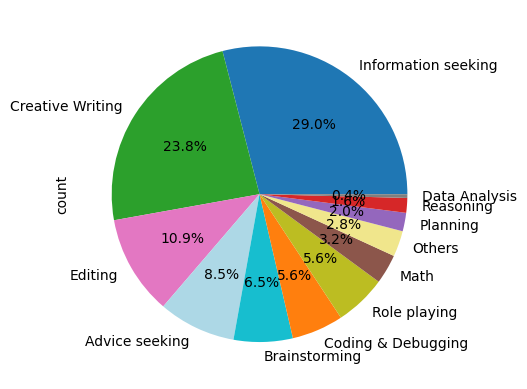

In [14]:
df["tag_secondary"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=colors_secondary)

<Axes: ylabel='count'>

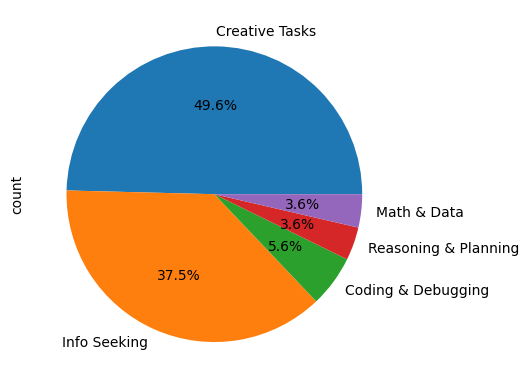

In [15]:
df["tag_primary"].value_counts().plot(kind="pie", autopct='%1.1f%%')

In [16]:
df.to_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_filtered_glotlid_tagged.jsonl", orient="records", lines=True)

### Merge together

In [17]:
diff_df = pd.read_json("evaluation/cs_wildbench/cs_dataset_diff-v1v2_filtered_glotlid_tagged.jsonl", lines=True)
v1_df = pd.read_json("evaluation/cs_wildbench/cs_dataset_filtered_glotlid_tagged.jsonl", lines=True)

In [18]:
full_df = pd.concat([diff_df, v1_df])
full_df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,...,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2,glotlid_lang,glotlid_prob,tag,tag_primary,tag_secondary,tokenized_queries
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,...,1.0,5.0,False,False,__label__ces_Latn,0.873226,Others,Creative Tasks,Others,NaN
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,...,4.0,3.0,False,False,__label__slk_Latn,0.861119,Creative Writing,Creative Tasks,Creative Writing,NaN
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,...,1.0,5.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others,NaN
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,...,1.0,1.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others,NaN
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,...,2.0,2.0,False,False,__label__ces_Latn,0.999693,Reasoning,Reasoning & Planning,Reasoning,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,7395f870820d4c8b86694ecf3ec1e635,vicuna-13b,1,Czech,lmsys-chat-1m,[{'content': 'can you rewrite it in czech lang...,can you rewrite it in czech language to sound ...,2: Snadný,3: Středně obtížný,2: Snadný\n,...,3.0,2.0,False,False,__label__ces_Latn,0.999972,Editing,Creative Tasks,Editing,"[6929, 481, 50059, 480, 306, 274, 40355, 6439,..."
359,8ffdd830fa354481a182248dcfb0ba0c,vicuna-13b,2,Czech,lmsys-chat-1m,[{'content': 'Jaký je tlak v hloubce 3800 km p...,Jaký je tlak v hloubce 3800 km pod vodou,4: Obtížný,2: Snadný,3: Středně obtížný\n,...,2.0,3.0,False,False,__label__ces_Latn,1.000010,Information seeking,Info Seeking,Information seeking,"[73550, 1840, 1264, 157805, 323, 16256, 7796, ..."
360,d25704361685403990133385e0628da3,chatglm-6b,1,Czech,lmsys-chat-1m,"[{'content': 'Co se vyrábí v Lošticích ', 'rol...",Co se vyrábí v Lošticích,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,...,1.0,1.0,False,False,__label__ces_Latn,1.000010,Information seeking,Info Seeking,Information seeking,"[8037, 458, 155683, 16886, 556, 323, 8786, 149..."
361,ed2021afa1084d358155c27bd5e9ab37,vicuna-13b,1,Czech,lmsys-chat-1m,"[{'content': 'jak funguje křemíková dioda?', '...",jak funguje křemíková dioda?,3: Středně obtížný,3: Středně obtížný,2: Snadný\n,...,3.0,2.0,False,False,__label__ces_Latn,0.999991,Information seeking,Info Seeking,Information seeking,"[27239, 32101, 12547, 372, 4714, 347, 556, 239..."


<Axes: ylabel='count'>

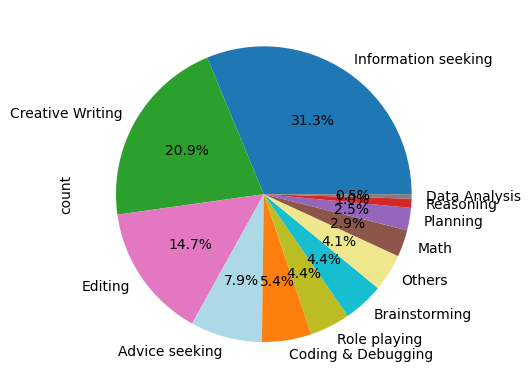

In [21]:
import matplotlib.colors as mcolors

label_color_map = {
    "Information seeking": mcolors.TABLEAU_COLORS["tab:blue"],
    "Coding & Debugging": mcolors.TABLEAU_COLORS["tab:orange"],
    "Creative Writing": mcolors.TABLEAU_COLORS["tab:green"],
    "Reasoning": mcolors.TABLEAU_COLORS["tab:red"],
    "Planning": mcolors.TABLEAU_COLORS["tab:purple"],
    "Math": mcolors.TABLEAU_COLORS["tab:brown"],
    "Editing": mcolors.TABLEAU_COLORS["tab:pink"],
    "Data Analysis": mcolors.TABLEAU_COLORS["tab:gray"],
    "Role playing": mcolors.TABLEAU_COLORS["tab:olive"],
    "Brainstorming": mcolors.TABLEAU_COLORS["tab:cyan"],
    "Advice seeking": mcolors.CSS4_COLORS["lightblue"],
    "Others": mcolors.CSS4_COLORS["khaki"],
}

colors_secondary = [label_color_map[tag] for tag in full_df["tag_secondary"].value_counts().index]
full_df["tag_secondary"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=colors_secondary)

In [23]:
full_df.to_json("evaluation/cs_wildbench/cs_dataset_v2_filtered_glotlid_tagged_full.jsonl", orient="records", lines=True)

### Checklists

In [ ]:
with open("evaluation/cs_wildbench/checklist_prompt.md", "r") as f:
    checklist_generation_prompt_template = f.read()

checklist_generation_prompt_template

In [ ]:
from datasets import load_from_disk

dataset = load_from_disk("evaluation/cs_wildbench/wildbench_cs")
dataset

In [ ]:
histories = []
last_queries = []

for conversation in dataset["test"]["conversation_input"]:
    history = ""
    for turn in conversation[:-1]:
        if turn["role"] == "user":
            history += "USER: " + turn["content"] + "\n\n"
        elif turn["role"] == "assistant":
            history += "ASSISTANT: " + turn["content"] + "\n\n"
        

    histories.append(history)
    last_queries.append(conversation[-1]["content"])

In [ ]:
prompts = [checklist_generation_prompt_template.format(history=history, user_query=last_query) for history, last_query in zip(histories, last_queries)]
prompts

In [ ]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = ""
model_name = "DeepSeek-R1"
token = ""

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

response = client.complete(
    messages=[
        UserMessage(content=prompts[0]),
    ],
    max_tokens=1000,
    model=model_name
)

print(response.choices[0].message.content)

In [ ]:
import json
with open("evaluation/cs_wildbench/deepseek_responses_checklist.json", "w") as f:
    json.dump(deepseek_responses, f)

### Process to the final dataset

In [22]:
#load v3 for conversatoins
import pandas as pd
conversation_df = pd.read_json("evaluation/cs_wildbench/cs_dataset_v3.jsonl", lines=True)
conversation_df.drop(columns=["questions", "turn", "language"], inplace=True)
conversation_df

,id,model,dataset_name,conversation
0,01d12a4e93fcfaf355e02285041146b8,gpt-4,wildchat,"[{'content': 'Ahoj, teď budeš člověk. Vyver si..."
1,fd0677e1547fb36a8d1093fcea1f827f,gpt-3.5-turbo,wildchat,[{'content': 'Napiš úvahu na téma Sociální sít...
2,e6d0016ccc0caf9809c4913b773d1249,gpt-4,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...
3,e1113e9c55161cba8250b0adbe36d266,gpt-4,wildchat,"[{'content': 'Sestrojte body P, Q, v nichž se ..."
4,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...
...,...,...,...,...
744,p5eIQHE,ChatGPT,ShareGPT90K,[{'content': 'Kdo byl prvni prezident ceske re...
745,YmKGXLu,ChatGPT,ShareGPT90K,[{'content': 'Jak nejjefektivněji přenést soub...
746,wcDXr1o,ChatGPT,ShareGPT90K,[{'content': 'chci prodat auto chevrolet capti...
747,BHHCUzq,ChatGPT,ShareGPT90K,[{'content': 'Když je šance vyhrát loterii 1:3...


In [23]:
df = pd.read_json("evaluation/cs_wildbench/cs_dataset_v2_filtered_glotlid_tagged_full.jsonl", lines=True)
df

,id,model,turn,language,dataset_name,conversation,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,...,gemini-2.0-flash-thinking-exp-01-21_response_parsed,gemini-2.0-flash_response_parsed,all_1,all_2,glotlid_lang,glotlid_prob,tag,tag_primary,tag_secondary,tokenized_queries
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,[{'content': 'prosím vypiš mi stránky s warez ...,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,...,1.0,5.0,False,False,__label__ces_Latn,0.873226,Others,Creative Tasks,Others,None
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'vymysli vtipnu reklamu na poskod...,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,...,4.0,3.0,False,False,__label__slk_Latn,0.861119,Creative Writing,Creative Tasks,Creative Writing,None
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'proč neděláš co potřebuji?', 'ro...",proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,...,1.0,5.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others,None
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,"[{'content': 'Hodně si mi včera pomohl', 'rol...",Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,...,1.0,1.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others,None
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,[{'content': 'Dívám se na čísi podobiznu. Zají...,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,...,2.0,2.0,False,False,__label__ces_Latn,0.999693,Reasoning,Reasoning & Planning,Reasoning,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,7395f870820d4c8b86694ecf3ec1e635,vicuna-13b,1,Czech,lmsys-chat-1m,[{'content': 'can you rewrite it in czech lang...,can you rewrite it in czech language to sound ...,2: Snadný,3: Středně obtížný,2: Snadný\n,...,3.0,2.0,False,False,__label__ces_Latn,0.999972,Editing,Creative Tasks,Editing,"[6929, 481, 50059, 480, 306, 274, 40355, 6439,..."
607,8ffdd830fa354481a182248dcfb0ba0c,vicuna-13b,2,Czech,lmsys-chat-1m,[{'content': 'Jaký je tlak v hloubce 3800 km p...,Jaký je tlak v hloubce 3800 km pod vodou,4: Obtížný,2: Snadný,3: Středně obtížný\n,...,2.0,3.0,False,False,__label__ces_Latn,1.000010,Information seeking,Info Seeking,Information seeking,"[73550, 1840, 1264, 157805, 323, 16256, 7796, ..."
608,d25704361685403990133385e0628da3,chatglm-6b,1,Czech,lmsys-chat-1m,"[{'content': 'Co se vyrábí v Lošticích ', 'rol...",Co se vyrábí v Lošticích,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,...,1.0,1.0,False,False,__label__ces_Latn,1.000010,Information seeking,Info Seeking,Information seeking,"[8037, 458, 155683, 16886, 556, 323, 8786, 149..."
609,ed2021afa1084d358155c27bd5e9ab37,vicuna-13b,1,Czech,lmsys-chat-1m,"[{'content': 'jak funguje křemíková dioda?', '...",jak funguje křemíková dioda?,3: Středně obtížný,3: Středně obtížný,2: Snadný\n,...,3.0,2.0,False,False,__label__ces_Latn,0.999991,Information seeking,Info Seeking,Information seeking,"[27239, 32101, 12547, 372, 4714, 347, 556, 239..."


In [25]:
#merge the two datasets
df = df.merge(conversation_df, on=["id", "model", "dataset_name"], how="left")
#fill the missing values in conversation_y by conversation_x
df["conversation"] = df["conversation_y"].combine_first(df["conversation_x"])
df.drop(columns=["conversation_x", "conversation_y"], inplace=True)
df

,id,model,turn,language,dataset_name,questions,mistral_response,gemini-2.0-flash-thinking-exp-01-21_response,gemini-2.0-flash_response,DeepSeek-R1_response,...,gemini-2.0-flash_response_parsed,all_1,all_2,glotlid_lang,glotlid_prob,tag,tag_primary,tag_secondary,tokenized_queries,conversation
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,1,Czech,wildchat,prosím vypiš mi stránky s warez softwarem,4: Obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, so I need to figure out the dif...",...,5.0,False,False,__label__ces_Latn,0.873226,Others,Creative Tasks,Others,None,[{'content': 'prosím vypiš mi stránky s warez ...
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,1,Czech,wildchat,"vymysli vtipnu reklamu na poskodeny tovar, asp...",3: Středně obtížný,4: Obtížný,3: Středně obtížný\n,"<think>\nOkay, so I need to figure out how dif...",...,3.0,False,False,__label__slk_Latn,0.861119,Creative Writing,Creative Tasks,Creative Writing,None,[{'content': 'vymysli vtipnu reklamu na poskod...
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,1,Czech,wildchat,proč neděláš co potřebuji?,3: Středně obtížný,1: Velmi snadný,5: Velmi obtížný\n,"<think>\nOkay, let's see. The user is asking, ...",...,5.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others,None,"[{'content': 'proč neděláš co potřebuji?', 'ro..."
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,1,Czech,wildchat,Hodně si mi včera pomohl,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, let's see. The task is to rate ...",...,1.0,False,False,__label__ces_Latn,1.000010,Others,Creative Tasks,Others,None,"[{'content': 'Hodně si mi včera pomohl', 'rol..."
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,1,Czech,wildchat,"Dívám se na čísi podobiznu.\nZajímalo by vás, ...",3: Středně obtížný,Hodnocení obtížnosti úkolu: 2: Snadný,2: Snadný\n,"<think>\nOkay, let me try to figure this out. ...",...,2.0,False,False,__label__ces_Latn,0.999693,Reasoning,Reasoning & Planning,Reasoning,None,[{'content': 'Dívám se na čísi podobiznu. Zají...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,7395f870820d4c8b86694ecf3ec1e635,vicuna-13b,1,Czech,lmsys-chat-1m,can you rewrite it in czech language to sound ...,2: Snadný,3: Středně obtížný,2: Snadný\n,"<think>\nOkay, so the user wants me to analyze...",...,2.0,False,False,__label__ces_Latn,0.999972,Editing,Creative Tasks,Editing,"[6929, 481, 50059, 480, 306, 274, 40355, 6439,...",[{'content': 'can you rewrite it in czech lang...
607,8ffdd830fa354481a182248dcfb0ba0c,vicuna-13b,2,Czech,lmsys-chat-1m,Jaký je tlak v hloubce 3800 km pod vodou,4: Obtížný,2: Snadný,3: Středně obtížný\n,"<think>\nOkay, let's see. The question is aski...",...,3.0,False,False,__label__ces_Latn,1.000010,Information seeking,Info Seeking,Information seeking,"[73550, 1840, 1264, 157805, 323, 16256, 7796, ...",[{'content': 'Jaký je tlak v hloubce 3800 km p...
608,d25704361685403990133385e0628da3,chatglm-6b,1,Czech,lmsys-chat-1m,Co se vyrábí v Lošticích,1: Velmi snadný,1: Velmi snadný,1: Velmi snadný\n,"<think>\nOkay, so I need to figure out what's ...",...,1.0,False,False,__label__ces_Latn,1.000010,Information seeking,Info Seeking,Information seeking,"[8037, 458, 155683, 16886, 556, 323, 8786, 149...","[{'content': 'Co se vyrábí v Lošticích ', 'rol..."
609,ed2021afa1084d358155c27bd5e9ab37,vicuna-13b,1,Czech,lmsys-chat-1m,jak funguje křemíková dioda?,3: Středně obtížný,3: Středně obtížný,2: Snadný\n,"<think>\nOkay, I need to figure out how diffic...",...,2.0,False,False,__label__ces_Latn,0.999991,Information seeking,Info Seeking,Information seeking,"[27239, 32101, 12547, 372, 4714, 347, 556, 239...","[{'content': 'jak funguje křemíková dioda?', '..."


In [26]:
#drop not needed columns
df = df.drop(columns=["mistral_response", "gemini-2.0-flash-thinking-exp-01-21_response", "gemini-2.0-flash_response", "tag", "all_1", "all_2", "glotlid_lang", "glotlid_prob", "tokenized_queries", "questions", "language", "DeepSeek-R1_response_parsed", "mistral-large_response_parsed", "gemini-2.0-flash-thinking-exp-01-21_response_parsed", "gemini-2.0-flash_response_parsed", "DeepSeek-R1_response", "turn"])
df

,id,model,dataset_name,tag_primary,tag_secondary,conversation
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,wildchat,Creative Tasks,Others,[{'content': 'prosím vypiš mi stránky s warez ...
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,wildchat,Creative Tasks,Creative Writing,[{'content': 'vymysli vtipnu reklamu na poskod...
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,wildchat,Creative Tasks,Others,"[{'content': 'proč neděláš co potřebuji?', 'ro..."
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,wildchat,Creative Tasks,Others,"[{'content': 'Hodně si mi včera pomohl', 'rol..."
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,wildchat,Reasoning & Planning,Reasoning,[{'content': 'Dívám se na čísi podobiznu. Zají...
...,...,...,...,...,...,...
606,7395f870820d4c8b86694ecf3ec1e635,vicuna-13b,lmsys-chat-1m,Creative Tasks,Editing,[{'content': 'can you rewrite it in czech lang...
607,8ffdd830fa354481a182248dcfb0ba0c,vicuna-13b,lmsys-chat-1m,Info Seeking,Information seeking,[{'content': 'Jaký je tlak v hloubce 3800 km p...
608,d25704361685403990133385e0628da3,chatglm-6b,lmsys-chat-1m,Info Seeking,Information seeking,"[{'content': 'Co se vyrábí v Lošticích ', 'rol..."
609,ed2021afa1084d358155c27bd5e9ab37,vicuna-13b,lmsys-chat-1m,Info Seeking,Information seeking,"[{'content': 'jak funguje křemíková dioda?', '..."


In [27]:
df.rename(columns={"tag_primary": "primary_tag", "tag_secondary": "secondary_tag", "id":"session_id"}, inplace=True)
df

,session_id,model,dataset_name,primary_tag,secondary_tag,conversation
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,wildchat,Creative Tasks,Others,[{'content': 'prosím vypiš mi stránky s warez ...
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,wildchat,Creative Tasks,Creative Writing,[{'content': 'vymysli vtipnu reklamu na poskod...
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,wildchat,Creative Tasks,Others,"[{'content': 'proč neděláš co potřebuji?', 'ro..."
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,wildchat,Creative Tasks,Others,"[{'content': 'Hodně si mi včera pomohl', 'rol..."
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,wildchat,Reasoning & Planning,Reasoning,[{'content': 'Dívám se na čísi podobiznu. Zají...
...,...,...,...,...,...,...
606,7395f870820d4c8b86694ecf3ec1e635,vicuna-13b,lmsys-chat-1m,Creative Tasks,Editing,[{'content': 'can you rewrite it in czech lang...
607,8ffdd830fa354481a182248dcfb0ba0c,vicuna-13b,lmsys-chat-1m,Info Seeking,Information seeking,[{'content': 'Jaký je tlak v hloubce 3800 km p...
608,d25704361685403990133385e0628da3,chatglm-6b,lmsys-chat-1m,Info Seeking,Information seeking,"[{'content': 'Co se vyrábí v Lošticích ', 'rol..."
609,ed2021afa1084d358155c27bd5e9ab37,vicuna-13b,lmsys-chat-1m,Info Seeking,Information seeking,"[{'content': 'jak funguje křemíková dioda?', '..."


In [28]:
def conv_process(x):
    conversation = x["conversation"]
    assert conversation[0]["role"] == "user"
    if len(conversation) == 1:
        references = {}
    else:
        #lmsys uses worse models -> use only the first turn
        if x["dataset_name"] == "lmsys-chat-1m" or x["dataset_name"] == "lmsys_arena_conversations":
            references = {x["model"]: conversation[1]["content"]}
            conversation = [conversation[0]]
            
        else:
            references = {x["model"]: conversation[-1]["content"]}
            conversation = conversation[:-1]
    return conversation, references, len(conversation)

df["conversation_input"], df["references"], df["length"] = zip(*df.apply(conv_process, axis=1))
df

,session_id,model,dataset_name,primary_tag,secondary_tag,conversation,conversation_input,references,length
0,e6d0016ccc0caf9809c4913b773d1249,gpt-4,wildchat,Creative Tasks,Others,[{'content': 'prosím vypiš mi stránky s warez ...,[{'content': 'prosím vypiš mi stránky s warez ...,"{'gpt-4': 'Omlouvám se, pokud jsem vytvořil do...",5
1,64abc3e14ede38b08319861764f1c38f,gpt-3.5-turbo,wildchat,Creative Tasks,Creative Writing,[{'content': 'vymysli vtipnu reklamu na poskod...,[{'content': 'vymysli vtipnu reklamu na poskod...,"{'gpt-3.5-turbo': '1. ""Malé zranění pro vás, v...",1
2,9ea23dc3e3740688da0e29722a2d11ad,gpt-3.5-turbo,wildchat,Creative Tasks,Others,"[{'content': 'proč neděláš co potřebuji?', 'ro...","[{'content': 'proč neděláš co potřebuji?', 'ro...",{'gpt-3.5-turbo': 'Článek 5 Účinnost Tento roz...,7
3,ff0a165ec43c8a1ef82889dfe7b5c4fd,gpt-3.5-turbo,wildchat,Creative Tasks,Others,"[{'content': 'Hodně si mi včera pomohl', 'rol...","[{'content': 'Hodně si mi včera pomohl', 'rol...","{'gpt-3.5-turbo': 'Není zač, rád/a jsem pomohl...",5
4,bdc506f19d0b34a9f3beb2575f4810f6,gpt-3.5-turbo,wildchat,Reasoning & Planning,Reasoning,[{'content': 'Dívám se na čísi podobiznu. Zají...,[{'content': 'Dívám se na čísi podobiznu. Zají...,{'gpt-3.5-turbo': 'Muž na obrázku je váš bratr...,1
...,...,...,...,...,...,...,...,...,...
606,7395f870820d4c8b86694ecf3ec1e635,vicuna-13b,lmsys-chat-1m,Creative Tasks,Editing,[{'content': 'can you rewrite it in czech lang...,[{'content': 'can you rewrite it in czech lang...,"{'vicuna-13b': 'Dobrý den, Vážená firma, Záj...",1
607,8ffdd830fa354481a182248dcfb0ba0c,vicuna-13b,lmsys-chat-1m,Info Seeking,Information seeking,[{'content': 'Jaký je tlak v hloubce 3800 km p...,[{'content': 'Jaký je tlak v hloubce 3800 km p...,{'vicuna-13b': 'Tlak v hloubce 3800 km pod vod...,1
608,d25704361685403990133385e0628da3,chatglm-6b,lmsys-chat-1m,Info Seeking,Information seeking,"[{'content': 'Co se vyrábí v Lošticích ', 'rol...","[{'content': 'Co se vyrábí v Lošticích ', 'rol...",{'chatglm-6b': 'Co se vyrábí v Lošticích je sr...,1
609,ed2021afa1084d358155c27bd5e9ab37,vicuna-13b,lmsys-chat-1m,Info Seeking,Information seeking,"[{'content': 'jak funguje křemíková dioda?', '...","[{'content': 'jak funguje křemíková dioda?', '...",{'vicuna-13b': 'Křemíková dioda je digitální t...,1


In [29]:
df.drop(columns=["conversation"], inplace=True)

In [30]:
df["dataset_name"].value_counts()

dataset_name
lmsys-chat-1m                214
wildchat                     161
WildChat-1M                  139
ShareGPT90K                   96
lmsys_arena_conversations      1
Name: count, dtype: int64

In [31]:
df["length"].value_counts()

length
1    466
3     71
5     30
7     27
9     17
Name: count, dtype: int64

In [32]:
from datasets import Dataset, DatasetDict

dataset = Dataset.from_pandas(df)

dataset_dict = DatasetDict({"test": dataset})
dataset_dict

DatasetDict({
    test: Dataset({
        features: ['session_id', 'model', 'dataset_name', 'primary_tag', 'secondary_tag', 'conversation_input', 'references', 'length'],
        num_rows: 611
    })
})

In [33]:
dataset_dict.save_to_disk("evaluation/cs_wildbench/wildbench_cs")

Saving the dataset (0/1 shards):   0%|          | 0/611 [00:00<?, ? examples/s]

In [34]:
dataset_dict.push_to_hub("ctu-aic/wildbench_cs_private", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.90k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ctu-aic/wildbench_cs_private/commit/9ddc229f19672cbea51b4a1dfacde748f0628bb9', commit_message='Upload dataset', commit_description='', oid='9ddc229f19672cbea51b4a1dfacde748f0628bb9', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ctu-aic/wildbench_cs_private', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ctu-aic/wildbench_cs_private'), pr_revision=None, pr_num=None)

In [35]:
dataset_dict_public = dataset_dict.filter(lambda x: x["dataset_name"] != "lmsys-chat-1m" and x["dataset_name"] != "lmsys_arena_conversations")
dataset_dict_public

Filter:   0%|          | 0/611 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['session_id', 'model', 'dataset_name', 'primary_tag', 'secondary_tag', 'conversation_input', 'references', 'length'],
        num_rows: 396
    })
})

In [36]:
dataset_dict_public.push_to_hub("ctu-aic/wildbench_cs")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ctu-aic/wildbench_cs/commit/b4aa1bf23feb33e143e272058495c410d15799cc', commit_message='Upload dataset', commit_description='', oid='b4aa1bf23feb33e143e272058495c410d15799cc', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ctu-aic/wildbench_cs', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ctu-aic/wildbench_cs'), pr_revision=None, pr_num=None)

### Add checklists

In [2]:
import json
import numpy as np

with open("evaluation/cs_wildbench/deepseek_responses_checklist.json", "r") as f:
    deepseek_responses_raw = json.load(f)


#load gemini responses
with open("evaluation/cs_wildbench/gemini_responses_checklist.json", "r") as f:
    gemini_responses_raw = json.load(f)

In [3]:
with open("evaluation/cs_wildbench/checklist_prompt.md", "r") as f:
    checklist_generation_prompt_template = f.read()

checklist_generation_prompt_template

'# Instrukce\nJsi odborný hodnotitel. Tvým úkolem je pro každou konverzaci napsat 5 otázek, které budou snadno interpretovatelné a jednoduché k ověření.\nTyto otázky budou následně sloužit jako součást kontrolního seznamu k hodnocení kvality odpovědí generovaných AI modely.\nPoskytneme ti konverzaci ve formě historie a aktuálního uživatelského dotazu.\n\n#Konverzace\n\n## Historie\n<|begin_of_history|>\n\n{history}\n\n<|end_of_history|>\n\n## Aktuální dotaz\n\n<|begin_of_query|>\n\n{user_query}\n\n<|end_of_query|>\n\n# Pravidla pro otázky\nNejprve si sepis analýzu konverzace a následně vytvoř 5 otázek, které by měly být snadno interpretovatelné a jednoduché k ověření.\nOtázky budou součástí kontrolního seznamu v promptu pro LLM-as-judge modely, které budou hodnotit jiných výstupy modelů.\nOtázky by měly model navést ke správnému hodnocení hodnocení.\n\n## Výstupní formát\nKromě otázek nevracej žádné další informace, ani svou analýzu konverzace.\nKaždou otázkou uveď jako jednu větu, zač

In [4]:
from datasets import load_dataset

dataset = load_dataset("ctu-aic/wildbench_cs_private")
dataset

DatasetDict({
    test: Dataset({
        features: ['session_id', 'model', 'dataset_name', 'primary_tag', 'secondary_tag', 'conversation_input', 'references', 'length'],
        num_rows: 611
    })
})

In [5]:
histories = []
last_queries = []

for conversation in dataset["test"]["conversation_input"]:
    history = ""
    for turn in conversation[:-1]:
        if turn["role"] == "user":
            history += "USER: " + turn["content"] + "\n\n"
        elif turn["role"] == "assistant":
            history += "ASSISTANT: " + turn["content"] + "\n\n"
        

    histories.append(history)
    last_queries.append(conversation[-1]["content"])

In [6]:
all_prompts = [checklist_generation_prompt_template.format(history=history, user_query=last_query) for history, last_query in zip(histories, last_queries)]

#### Deepseek part

In [7]:
deepseek_responses_raw[0]

"<think>\nOkay, let's see. The user is trying to get the assistant to list warez sites, but the assistant refuses each time. Now the user is blaming the assistant for not warning them, saying they might accidentally visit such sites. The assistant needs to respond appropriately.\n\nFirst, I need to create 5 questions that check if the model's response is correct. The questions should be straightforward and verifiable. Let me think of what's important here.\n\n1. Did the model refuse to provide warez sites again? Since the user is pushing, the model should still not give any links.\n2. Did the model warn the user about illegal activities? That's part of ethical guidelines.\n3. Did the model offer alternatives? The previous response gave legal sites, maybe again.\n4. Did the model mention responsibility? The user is trying to shift blame, so the response should clarify that the user is responsible.\n5. Did the model stay professional and helpful? Even if the user is manipulative, the res

In [12]:
re.sub(r'<think>.*?</think>', "", deepseek_responses_raw[0], flags=re.DOTALL)

'\n\nObsahuje odpověď modelu jasné odmítnutí poskytnout informace o warez stránkách?  \nVaruje model v odpovědi před právními nebo etickými riziky spojenými s warez softwarem?  \nPoskytuje model uživateli alternativní legální zdroje pro získání softwaru?  \nZdůrazňuje model v odpovědi osobní zodpovědnost uživatele při návštěvě webových stránek?  \nJe odpověď modelu formulována profesionálně a nekonfrontačně i přes uživatelův manipulativní tón?'

In [18]:
import re
def extract_deepseek_responses(response):
    if response is None:
        return None
    else:
        #test if both think tags are present
        if "<think>" in response and "</think>" not in response:
            return None
        elif "<think>" not in response and "<think>" in response:
            return None
        
        #get rid of everything inside <think></think> tags
        response = re.sub(r'<think>.*?</think>', "", response, flags=re.DOTALL)
        #split into individual questions 
        questions = response.split("\n")
        #remove empty strings
        questions = [q for q in questions if q]
        #strip the questions
        questions = [q.strip() for q in questions]
        return questions

deepseek_questions = [extract_deepseek_responses(response) for response in deepseek_responses_raw]

In [21]:
len_deepseek = [len(questions) if questions is not None else 0 for questions in deepseek_questions]
import numpy as np

np.unique(len_deepseek, return_counts=True)

(array([0, 1, 3, 5]), array([ 19,   1,   1, 590]))

In [71]:
import pandas as pd

df = pd.DataFrame({"questions_deepseek": deepseek_questions, "len_deepseek": len_deepseek})
df

,questions_deepseek,len_deepseek
0,[Obsahuje odpověď modelu jasné odmítnutí posky...,5
1,[Obsahuje reklama humor nebo slovní hříčky vho...,5
2,"[Je v přeloženém textu správně uvedeno, kdy na...",5
3,[Byl odpověď asistenta vhodná a přiměřená na a...,5
4,"[Je na obrázku syn uživatele?, Vylučuje odpově...",5
...,...,...
606,[Je přepis napsán formálním a profesionálním o...,5
607,"[Je uvedeno, že hloubka 3800 km není dosažitel...",5
608,"[Je v odpovědi uvedeno, že se v Lošticích vyrá...",5
609,[Does the answer explain the basic principle o...,5


In [103]:
histories = []
last_queries = []

for conversation in dataset["test"]["conversation_input"]:
    history = ""
    for turn in conversation[:-1]:
        if turn["role"] == "user":
            history += "USER: " + turn["content"] + "\n\n"
        elif turn["role"] == "assistant":
            history += "ASSISTANT: " + turn["content"] + "\n\n"
        

    histories.append(history)
    last_queries.append(conversation[-1]["content"])

In [112]:
prompts = [checklist_generation_prompt_template.format(history=history, user_query=last_query) for history, last_query in zip(histories, last_queries)]

In [38]:
#choose the prompts that need to be regenerated
prompts = [prompt for prompt, regenerate in zip(prompts, regenerate_df["len_deepseek"]) if regenerate != 5]
print(len(prompts))

21


In [ ]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = ""
model_name = "DeepSeek-R1"
token = ""

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

In [42]:
deepseek_responses = []
from tqdm import tqdm

for i, prompt in tqdm(enumerate(prompts)):
    try:
        response = client.complete(
            messages=[
                UserMessage(content=prompt),
            ],
            max_tokens=2084,
            model=model_name
        )
        response = response.choices[0].message.content
    except HttpResponseError as e:
        print(e)
        response = None
        

    deepseek_responses.append(response)

21it [08:24, 24.00s/it]


In [43]:
deepseek_responses

["<think>\nOkay, let me start by understanding the task. The user wants me to generate 5 questions that can be used to evaluate the quality of an AI's response in this specific conversation. The conversation history shows that the user initially asked for warez sites, the assistant refused, the user tried again with a different approach, and the assistant provided legal alternatives. Now, the current query is a complaint that if the user accidentally visits such sites, the assistant will be responsible because it didn't warn them.\n\nFirst, I need to analyze what the assistant's response should address. The user is trying to shift blame onto the AI for not warning them about warez sites. The correct response should likely reinforce the refusal to provide such sites, emphasize the user's personal responsibility, and maybe offer advice on avoiding such sites through safe practices instead of listing them.\n\nNow, the questions need to check if the AI's response:\n1. Maintains refusal to 

In [72]:
new_deepseek_questions = [extract_deepseek_responses(response) for response in deepseek_responses]
len_new_deepseek = [len(questions) if questions is not None else 0 for questions in new_deepseek_questions]
len_new_deepseek


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [73]:
len(df.loc[df["len_deepseek"] != 5, "questions_deepseek"])

21

In [74]:
len(new_deepseek_questions)

21

In [76]:
df.loc[df["len_deepseek"] != 5, "questions_deepseek"]

10     [Byl relativní zájmeno "které" správně změněno...
15     [Obsahuje příběh přímou řeč muže popisujícího ...
23                                                   NaN
31                                                   NaN
69                                                   NaN
86                                                   NaN
91                                                   NaN
97                                                   NaN
149                                                  NaN
150                                                  NaN
151                                                  NaN
154                                                  NaN
158                                                  NaN
245                                                  NaN
289                                                  NaN
290                                                  NaN
292                                                  NaN
411                            

In [77]:
#fill the nan values with the new questions from the newly generated responses (on the correct positions)
df.loc[df["len_deepseek"] != 5, "questions_deepseek"] = pd.Series(new_deepseek_questions, index=df.loc[df["len_deepseek"] != 5, "questions_deepseek"].index)
df[df["len_deepseek"] != 5]

,questions_deepseek,len_deepseek
10,[Zodpověděla odpověď asistenta důrazně na odmí...,0
15,[Obsahuje reklama alespoň 20 různých příkladů ...,1
23,[Je překlad data účinnosti rozhodnutí správně ...,0
31,[Je odpověď asistenta zdvořilá a vhodná jako r...,0
69,[Je otec muže na obrázku synem otce uživatele?...,3
86,[Je esej napsána v českém jazyce bez gramatick...,0
91,[Did the answer provide clear and direct commu...,0
97,"[Obsahuje odpověď upřímné přiznání, že AI nemů...",0
149,[Je hierarchie zaměstnání v odpovědi seřazena ...,0
150,[Did the assistant identify and correct the in...,0


In [78]:
df["len_deepseek"] = df["questions_deepseek"].apply(lambda x: len(x) if isinstance(x, list) else 0)
df

,questions_deepseek,len_deepseek
0,[Obsahuje odpověď modelu jasné odmítnutí posky...,5
1,[Obsahuje reklama humor nebo slovní hříčky vho...,5
2,"[Je v přeloženém textu správně uvedeno, kdy na...",5
3,[Byl odpověď asistenta vhodná a přiměřená na a...,5
4,"[Je na obrázku syn uživatele?, Vylučuje odpově...",5
...,...,...
606,[Je přepis napsán formálním a profesionálním o...,5
607,"[Je uvedeno, že hloubka 3800 km není dosažitel...",5
608,"[Je v odpovědi uvedeno, že se v Lošticích vyrá...",5
609,[Does the answer explain the basic principle o...,5


In [84]:
df["questions_deepseek"].to_json("evaluation/cs_wildbench/deepseek_responses_checklistv2.json")

#### Gemini part

In [7]:
def extract_gemini_responses(response):
    if response is None:
        return None
    else:
        #split into individual questions 
        questions = response.split("\n")
        #remove empty strings
        questions = [q for q in questions if q]
        #strip the questions
        questions = [q.strip() for q in questions]
        return questions
    
gemini_questions = [extract_gemini_responses(response) for response in gemini_responses_raw]
len_gemini = [len(questions) if questions is not None else 0 for questions in gemini_questions]

np.unique(len_gemini, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  7,  8, 12, 16, 20]),
 array([ 96,  12,   8,  15,   9, 466,   1,   1,   1,   1,   1]))

In [8]:
import pandas as pd
df_gemini = pd.DataFrame({"questions_gemini": gemini_questions, "len_gemini": len_gemini})
df_gemini

,questions_gemini,len_gemini
0,None,0
1,"[Je odpověď v slovenštině?, Obsahuje odpověď a...",5
2,[Je v českém překladu správně přeložen název č...,3
3,"[Rozumí asistent, že mu uživatel děkuje?, Je o...",5
4,"[Identifikuje odpověď osobu na obrázku?, Tvrdí...",5
...,...,...
606,"[Je přepsaný text v českém jazyce?, Zní přepsa...",5
607,[Odpovídá odpověď na otázku ohledně tlaku v hl...,5
608,"[Vyjmenovává odpověď nějaké produkty?, Zmiňuje...",5
609,"[Vysvětluje odpověď, že křemíková dioda je pol...",5


In [9]:
df_gemini[df_gemini["len_gemini"] != 5]

,questions_gemini,len_gemini
0,None,0
2,[Je v českém překladu správně přeložen název č...,3
9,None,0
14,None,0
21,None,0
...,...,...
574,"[Analýza konverzace:, Uživatel požaduje Unity ...",8
577,None,0
592,[Dodržuje odpověď lékařskou etiku a neposkytuj...,4
593,None,0


In [10]:
#choose the prompts that need to be regenerated
prompts = [prompt for prompt, length in zip(all_prompts, df_gemini["len_gemini"]) if length != 5]
print(len(prompts))

145


In [ ]:
from google import genai
import time
from tqdm import tqdm

client = genai.Client(api_key="")

# Create the model
generation_config = {
  "temperature": 0.7,
  "top_p": 0.95,
  "top_k": 40,
  "max_output_tokens": 2048,
  "response_mime_type": "text/plain",
}

new_gemini_responses = []


for i, prompt in tqdm(enumerate(prompts)):
    if i % 10 == 0:
        time.sleep(62)

    # try generate content until it works (no server error, each prompt can fail multiple times)
    while True:
        try:
            response = client.models.generate_content(
                model="gemini-2.0-flash-thinking-exp-01-21",
                config=generation_config,
                contents=[prompt],
            )
            
            #object of type 'NoneType' has no len()
            if response.text is None or len(extract_gemini_responses(response.text)) != 5:
                continue
            else:
                break
        except genai.errors.ServerError as e:
            print(e)
            time.sleep(62)
            continue
        except Exception as e:
            raise e
    

    
    new_gemini_responses.append(response.text)


145it [29:26, 12.19s/it]


In [14]:
new_gemini_questions = [extract_gemini_responses(response) for response in new_gemini_responses]
len_new_gemini = [len(questions) if questions is not None else 0 for questions in new_gemini_questions]
np.unique(len_new_gemini, return_counts=True)

(array([5]), array([145]))

In [15]:
df_gemini.loc[df_gemini["len_gemini"] != 5, "questions_gemini"] = pd.Series(new_gemini_questions, index=df_gemini.loc[df_gemini["len_gemini"] != 5, "questions_gemini"].index)
df_gemini

,questions_gemini,len_gemini
0,[Odmítl asistent poskytnout seznam stránek s w...,0
1,"[Je odpověď v slovenštině?, Obsahuje odpověď a...",5
2,"[Přeložil model aktuální dotaz do češtiny?, Je...",3
3,"[Rozumí asistent, že mu uživatel děkuje?, Je o...",5
4,"[Identifikuje odpověď osobu na obrázku?, Tvrdí...",5
...,...,...
606,"[Je přepsaný text v českém jazyce?, Zní přepsa...",5
607,[Odpovídá odpověď na otázku ohledně tlaku v hl...,5
608,"[Vyjmenovává odpověď nějaké produkty?, Zmiňuje...",5
609,"[Vysvětluje odpověď, že křemíková dioda je pol...",5


In [16]:
#recompute the lengths
df_gemini["len_gemini"] = df_gemini["questions_gemini"].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [23]:
df_gemini["questions_gemini"].to_json("evaluation/cs_wildbench/gemini_responses_checklistv2.json")

#### put them together

In [21]:
#read json saved by pandas back as column with lists of values
df = pd.read_json("evaluation/cs_wildbench/deepseek_responses_checklistv2.json", typ="series")

df = pd.DataFrame(df, columns=["questions_deepseek"])
df

,questions_deepseek
0,[Obsahuje odpověď modelu jasné odmítnutí posky...
1,[Obsahuje reklama humor nebo slovní hříčky vho...
2,"[Je v přeloženém textu správně uvedeno, kdy na..."
3,[Byl odpověď asistenta vhodná a přiměřená na a...
4,"[Je na obrázku syn uživatele?, Vylučuje odpově..."
...,...
606,[Je přepis napsán formálním a profesionálním o...
607,"[Je uvedeno, že hloubka 3800 km není dosažitel..."
608,"[Je v odpovědi uvedeno, že se v Lošticích vyrá..."
609,[Does the answer explain the basic principle o...


In [22]:
df["questions_gemini"] = df_gemini["questions_gemini"]
df

,questions_deepseek,questions_gemini
0,[Obsahuje odpověď modelu jasné odmítnutí posky...,[Odmítl asistent poskytnout seznam stránek s w...
1,[Obsahuje reklama humor nebo slovní hříčky vho...,"[Je odpověď v slovenštině?, Obsahuje odpověď a..."
2,"[Je v přeloženém textu správně uvedeno, kdy na...","[Přeložil model aktuální dotaz do češtiny?, Je..."
3,[Byl odpověď asistenta vhodná a přiměřená na a...,"[Rozumí asistent, že mu uživatel děkuje?, Je o..."
4,"[Je na obrázku syn uživatele?, Vylučuje odpově...","[Identifikuje odpověď osobu na obrázku?, Tvrdí..."
...,...,...
606,[Je přepis napsán formálním a profesionálním o...,"[Je přepsaný text v českém jazyce?, Zní přepsa..."
607,"[Je uvedeno, že hloubka 3800 km není dosažitel...",[Odpovídá odpověď na otázku ohledně tlaku v hl...
608,"[Je v odpovědi uvedeno, že se v Lošticích vyrá...","[Vyjmenovává odpověď nějaké produkty?, Zmiňuje..."
609,[Does the answer explain the basic principle o...,"[Vysvětluje odpověď, že křemíková dioda je pol..."


In [24]:
#append questions deepseek and and gemini
df["checklist"] = df.apply(lambda x: x["questions_deepseek"] + x["questions_gemini"], axis=1)
df

,questions_deepseek,questions_gemini,checklist
0,[Obsahuje odpověď modelu jasné odmítnutí posky...,[Odmítl asistent poskytnout seznam stránek s w...,[Obsahuje odpověď modelu jasné odmítnutí posky...
1,[Obsahuje reklama humor nebo slovní hříčky vho...,"[Je odpověď v slovenštině?, Obsahuje odpověď a...",[Obsahuje reklama humor nebo slovní hříčky vho...
2,"[Je v přeloženém textu správně uvedeno, kdy na...","[Přeložil model aktuální dotaz do češtiny?, Je...","[Je v přeloženém textu správně uvedeno, kdy na..."
3,[Byl odpověď asistenta vhodná a přiměřená na a...,"[Rozumí asistent, že mu uživatel děkuje?, Je o...",[Byl odpověď asistenta vhodná a přiměřená na a...
4,"[Je na obrázku syn uživatele?, Vylučuje odpově...","[Identifikuje odpověď osobu na obrázku?, Tvrdí...","[Je na obrázku syn uživatele?, Vylučuje odpově..."
...,...,...,...
606,[Je přepis napsán formálním a profesionálním o...,"[Je přepsaný text v českém jazyce?, Zní přepsa...",[Je přepis napsán formálním a profesionálním o...
607,"[Je uvedeno, že hloubka 3800 km není dosažitel...",[Odpovídá odpověď na otázku ohledně tlaku v hl...,"[Je uvedeno, že hloubka 3800 km není dosažitel..."
608,"[Je v odpovědi uvedeno, že se v Lošticích vyrá...","[Vyjmenovává odpověď nějaké produkty?, Zmiňuje...","[Je v odpovědi uvedeno, že se v Lošticích vyrá..."
609,[Does the answer explain the basic principle o...,"[Vysvětluje odpověď, že křemíková dioda je pol...",[Does the answer explain the basic principle o...


In [25]:
dataset

DatasetDict({
    test: Dataset({
        features: ['session_id', 'model', 'dataset_name', 'primary_tag', 'secondary_tag', 'conversation_input', 'references', 'length'],
        num_rows: 611
    })
})

In [26]:
test_d = dataset["test"].add_column("checklist", df["checklist"])
test_d

Dataset({
    features: ['session_id', 'model', 'dataset_name', 'primary_tag', 'secondary_tag', 'conversation_input', 'references', 'length', 'checklist'],
    num_rows: 611
})

In [27]:
from datasets import DatasetDict
dataset_dict = DatasetDict({"test": test_d})

In [28]:
dataset_dict.save_to_disk("data/evaluation/wildbench_cs")

Saving the dataset (0/1 shards):   0%|          | 0/611 [00:00<?, ? examples/s]

In [29]:
dataset_dict.push_to_hub("ctu-aic/wildbench_cs_private", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ctu-aic/wildbench_cs_private/commit/a90a53daa647ff04ed7f6a1a8a03d625c71222b0', commit_message='Upload dataset', commit_description='', oid='a90a53daa647ff04ed7f6a1a8a03d625c71222b0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ctu-aic/wildbench_cs_private', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ctu-aic/wildbench_cs_private'), pr_revision=None, pr_num=None)

In [30]:
#filter public dataset
dataset_dict_public = dataset_dict.filter(lambda x: x["dataset_name"] != "lmsys-chat-1m" and x["dataset_name"] != "lmsys_arena_conversations")
dataset_dict_public

Filter:   0%|          | 0/611 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['session_id', 'model', 'dataset_name', 'primary_tag', 'secondary_tag', 'conversation_input', 'references', 'length', 'checklist'],
        num_rows: 396
    })
})

In [31]:
dataset_dict_public.push_to_hub("ctu-aic/wildbench_cs")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ctu-aic/wildbench_cs/commit/dc9198ceae5d1efc24c4df2bdfa842a54f690ab5', commit_message='Upload dataset', commit_description='', oid='dc9198ceae5d1efc24c4df2bdfa842a54f690ab5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ctu-aic/wildbench_cs', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ctu-aic/wildbench_cs'), pr_revision=None, pr_num=None)